# Importing Required Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from IPython.display import Image
import warnings

In [2]:
sns.set(rc={'figure.figsize':(12, 10)})
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
warnings.filterwarnings('ignore')

# ==> 1. Data Sourcing <==

In [3]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [4]:
original_csv_file_shape = raw_data.shape
original_csv_file_shape

(39717, 110)

# ==> 2. Data Cleaning (Part 1) <==

### 2.1 Finding Columns With All Null Values

##### Finding columns with more than 50% Null Values

In [5]:
more_than_50_percent = round(raw_data.isnull().sum()/len(raw_data)*100, 2)
more_than_50_percent.sort_values(ascending=False)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

##### We can safely drop the columns which have missing values more than 50%

In [6]:
raw_data = raw_data.drop(more_than_50_percent[more_than_50_percent > 50].index, axis=1)

##### Let's check the columns with most empty values again (Percentage Wise)

In [7]:
(raw_data.isnull().sum()/len(raw_data)*100).sort_values(ascending=False).head(20)

desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
int_rate                       0.000000
loan_amnt                      0.000000
purpose                        0.000000
funded_amnt                    0.000000
url                            0.000000
funded_amnt_inv                0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
issue_d                        0.000000
dtype: float64

### 2.2 From the above numbers, lets start analysing each column one by one (which has missing value)

#### 2.2.1 Describe: On carefully reading the describe column, we can infer that, values in this column are some what representing the same as that of "purpose" column. And since purpose column has no null value, we can go ahead by dropping "desc" column and keeping "purpose" column

In [8]:
raw_data = raw_data.drop(columns=['desc'])

#### 2.2.2 Employee Title: This column contains the information on job title of people who have applied, and this could be usefull. We should not remove column, instead we can drop the missing values since the missing count is also low.

In [9]:
raw_data = raw_data[~raw_data.emp_title.isnull()]

#### 2.2.3 Employee Length: This column consists of information on professional experiance of employee and this could be useful parameter. We should not remove this column, instead we can drop the missing values.

In [10]:
raw_data = raw_data[~raw_data.emp_length.isnull()]

#### 2.2.4 Public Record Bankruptcies: This column consists of data related to bankruptcy. Though small, it can be decisive factor, hence dropping the missing rows only and not the column.

In [11]:
raw_data = raw_data[~raw_data.pub_rec_bankruptcies.isnull()]

#### 2.2.5 Last Month Payment Done: Dropping the rows with missing values, as missing value percentage is negligible

In [12]:
raw_data = raw_data[~raw_data.last_pymnt_d.isnull()]

#### 2.2.6 Revolving Line Utilization Rate: Dropping the rows with missing values, as missing value percentage is negligible

In [13]:
raw_data = raw_data[~raw_data.revol_util.isnull()]

#### 2.2.7 Loan Title: Dropping the rows with missing values, as missing value percentage is negligible. Also, it is kind of an additional comments for which the loan is required, which is again very much covered under 'purpose' column

In [14]:
raw_data = raw_data[~raw_data.title.isnull()]

#### 2.2.8 Recent Month LC pulled: Dropping the rows with missing values, as missing value percentage is negligible

In [15]:
raw_data = raw_data[~raw_data.last_credit_pull_d.isnull()]

#### 2.2.9 Other Columns

In [16]:
raw_data.tax_liens.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [17]:
raw_data.chargeoff_within_12_mths.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [18]:
raw_data.collections_12_mths_ex_med.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

**Following columns have all the values as zero, so, this columns are of no use. So, lets remove this columns.**
- 'tax_liens'
- 'chargeoff_within_12_mths'
- 'collections_12_mths_ex_med'

In [19]:
raw_data = raw_data.drop(columns=['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1)

### 2.4 Payment Plan Column consists of only one value i.e. 'n', so we can drop the same

In [20]:
raw_data = raw_data.drop(columns=['pymnt_plan'])

### 2.5 Initial List Status Column consists of only one value i.e. 'f', so we can drop the same

In [21]:
raw_data = raw_data.drop(columns=['initial_list_status'])

### 2.6 Policy Code Column consists of only one value i.e. 1, so we can drop the same

In [22]:
raw_data = raw_data.drop(columns=['policy_code'])

### 2.7 Application Type consists of only one value i.e. 'INDIVIDUAL', so we can drop the same

In [23]:
raw_data = raw_data.drop(columns=['application_type'])

### 2.8 The number of accounts on which the borrower is now delinquent & past-due amount owed column consists of only one value, so we can drop the same

In [24]:
raw_data = raw_data.drop(columns=['acc_now_delinq','delinq_amnt'])

### 2.9 Analysing Dataframe after dropping Rows & Columns

In [25]:
cleaned_data_shape = raw_data.shape
cleaned_data_shape

(36433, 43)

In [26]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-cleaned_data_shape[0]/original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 8.27 %


In [27]:
print('Percentage of Columns removed for entire Raw CSV File accounts to', round((1-cleaned_data_shape[1]/original_csv_file_shape[1])*100, 2), '%')

Percentage of Columns removed for entire Raw CSV File accounts to 60.91 %


# ==> 2. Data Cleaning (Part 2)<==

**This step involves**
- Formatting Data
- Converting them into respective formats
- Creating Categorical columns (if required, which can be easily considered for quick calculations)

##### Creating Generic Function to extract only float value from string (Usually used with percent related data)

In [28]:
def extract_valid_float_from_cell(row):
    row = re.sub('[%, ]', '', str(row))
    return round(float(row), 2)

### 2.10 Creating New Column of Funding Category on the basis of 'Funding Amount'

In [29]:
funded_amount_range = [*range(0, raw_data['funded_amnt'].max() + 5000, 5000)]
raw_data['funded_amount_category'] = pd.cut(raw_data['funded_amnt'], funded_amount_range)

In [30]:
raw_data['funded_amount_category'].value_counts(sort=False)

(0, 5000]          8597
(5000, 10000]     12082
(10000, 15000]     7665
(15000, 20000]     4291
(20000, 25000]     2491
(25000, 30000]      680
(30000, 35000]      627
Name: funded_amount_category, dtype: int64

### 2.11 Formatting Term Column

In [31]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [32]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

In [33]:
raw_data['term'].value_counts(sort=False)

36    26377
60    10056
Name: term, dtype: int64

### 2.12 Formatting Interest Rate Column to Float Value & Generating Categorical Column

In [34]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_cell)

In [35]:
int_rate_range = [*range(math.floor(raw_data['int_rate'].min()), math.ceil(raw_data['int_rate'].max() + 1.0), 1)]
raw_data['int_rate_category'] = pd.cut(raw_data['int_rate'], int_rate_range)

In [36]:
raw_data['int_rate_category'].value_counts(sort=False)

(5, 6]      1215
(6, 7]      2269
(7, 8]      4019
(8, 9]      1421
(9, 10]     2246
(10, 11]    3724
(11, 12]    4072
(12, 13]    3165
(13, 14]    3755
(14, 15]    2545
(15, 16]    2498
(16, 17]    1820
(17, 18]    1332
(18, 19]     859
(19, 20]     670
(20, 21]     460
(21, 22]     189
(22, 23]     129
(23, 24]      41
(24, 25]       4
Name: int_rate_category, dtype: int64

### 2.13 Formatting Installment Column

In [37]:
raw_data['installment'].dtype

dtype('float64')

##### No need to format Insallment Column as it is already in correct format (float value)

### 2.14 Creating newly mapped Grade Column

In [38]:
grade_list = list(raw_data['grade'].unique())
grade_list.sort()

In [39]:
grade_dict_mapped = {value:index for index, value in enumerate(grade_list)}
grade_dict_mapped

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

##### Creating mapped grade column, so that numerical operations would be possible (with respect to Grade Column)
##### Note that, mapped values are generic and can be assumed different as well

In [40]:
raw_data['grade_mapped'] = raw_data['grade'].map(grade_dict_mapped)

In [41]:
raw_data['grade_mapped'].value_counts(sort=False)

0     9175
1    11035
2     7431
3     4875
4     2650
5      969
6      298
Name: grade_mapped, dtype: int64

### 2.15 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing all the rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column.
##### (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)
##### This is done to verify if the numerical value in Sub-Grade column is somewhat impacting as a standalone without any Alphabet

In [42]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with creating a new column which have only the number present in sub-grade column

In [43]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [44]:
raw_data['sub_grade_only_number'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

In [45]:
raw_data['sub_grade'].value_counts(sort=False)

G5      25
A3    1630
B1    1643
D3    1078
F5     103
C2    1870
A4    2673
B5    2529
A2    1356
G3      44
D4     905
D2    1245
E5     376
A1    1005
E3     516
F1     315
D1     846
G4      56
D5     801
C3    1406
B2    1870
F3     170
E2     606
A5    2511
C1    1949
B3    2674
E4     423
G1      98
B4    2319
E1     729
G2      75
C4    1124
C5    1082
F4     151
F2     230
Name: sub_grade, dtype: int64

In [46]:
raw_data['sub_grade_only_number'].value_counts(sort=False)

1    6585
2    7252
3    7518
4    7651
5    7427
Name: sub_grade_only_number, dtype: int64

### 2.16 Formatting Employee Title

In [47]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.lower().replace('.', ''))

In [48]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.replace('united states', 'us') if 'united states' in x else x)

In [49]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.replace('u s', 'us') if 'u s ' in x else x)

In [50]:
raw_data['emp_title'] = raw_data['emp_title'].replace("jpmorgan chase", "jp morgan chase")
raw_data['emp_title'] = raw_data['emp_title'].replace("self", "self employed")
raw_data['emp_title'] = raw_data['emp_title'].replace("self-employed", "self employed")
raw_data['emp_title'] = raw_data['emp_title'].replace("wal-mart", "walmart")
raw_data['emp_title'] = raw_data['emp_title'].replace("wal mart", "walmart")
raw_data['emp_title'] = raw_data['emp_title'].replace("att", "at&t")

In [51]:
raw_data['emp_title'].value_counts()

us army                                                                           291
self employed                                                                     136
bank of america                                                                   136
us air force                                                                      115
walmart                                                                           113
us postal service                                                                 109
at&t                                                                               89
jp morgan chase                                                                    89
us navy                                                                            79
kaiser permanente                                                                  68
ibm                                                                                68
wells fargo                                           

### 2.17 Formatting Employee Length (Years of Experience) Column

In [52]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [53]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

In [54]:
raw_data.groupby(by='emp_length').emp_length.count()

emp_length
0.0     4052
1.0     3026
2.0     4178
3.0     3914
4.0     3297
5.0     3129
6.0     2121
7.0     1697
8.0     1405
9.0     1207
10.0    8407
Name: emp_length, dtype: int64

### 2.18 Formatting Ownership Column (Creating new mapped column)

In [55]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [56]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

##### Creating mapped home ownership column, so that numerical operations would be possible (with respect to Home Ownership Column)
##### Note that, mapped values are generic and can be assumed different as well

In [57]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

In [58]:
raw_data['home_ownership'].value_counts(sort=False)

OWN          2575
OTHER          94
RENT        17464
MORTGAGE    16300
Name: home_ownership, dtype: int64

### 2.19 Formatting Annual Income / Salary Column (Creating new mapped column)

In [59]:
raw_data['annual_inc'].dtype

dtype('float64')

##### No need to format Annual Income Column as it is already in correct format (float value)

In [60]:
raw_data.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

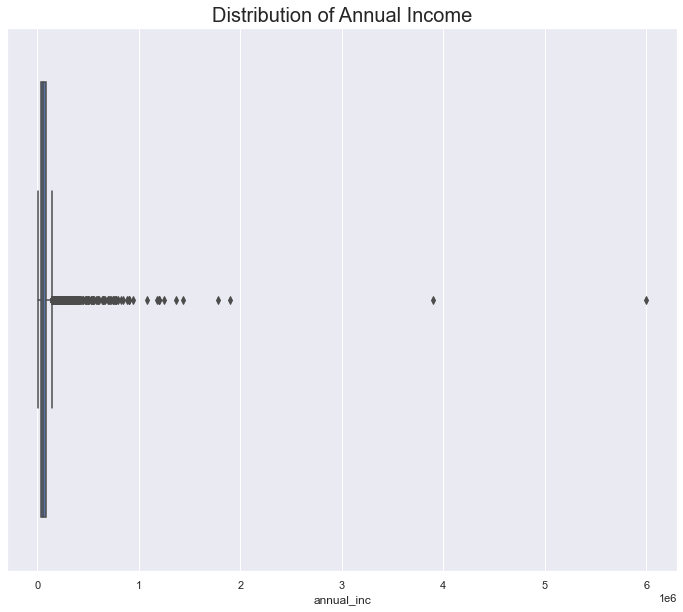

In [61]:
sns.boxplot(x=raw_data['annual_inc'], data=raw_data)
plt.title('Distribution of Annual Income', fontdict={'fontsize': 20})
plt.show()

##### We see that there are few outliers which are disturbing our observations. So we decide to cut out the outliers by taking value upto a quantile range of 98%

In [62]:
raw_data = raw_data[raw_data.annual_inc < raw_data['annual_inc'].quantile(0.98)]

In [63]:
raw_data.annual_inc.describe()

count     35704.000000
mean      64542.435351
std       31765.296321
min        4000.000000
25%       41000.000000
50%       58900.000000
75%       80000.000000
max      182952.000000
Name: annual_inc, dtype: float64

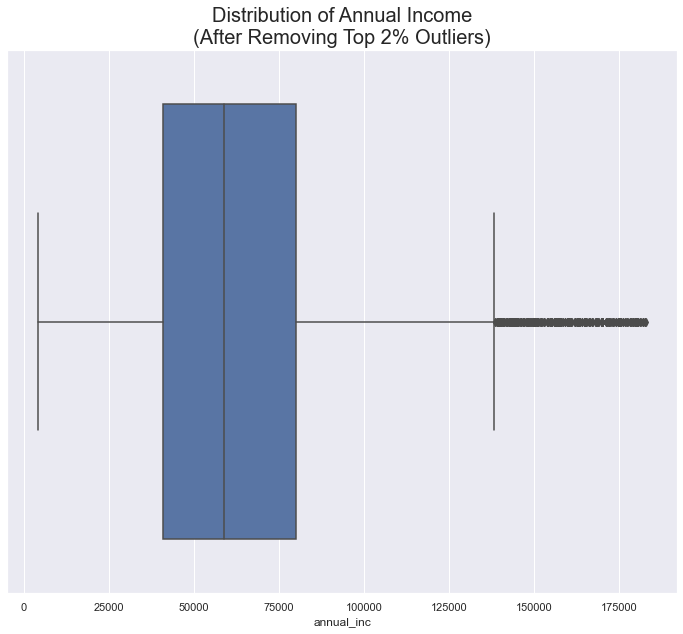

In [64]:
sns.boxplot(x=raw_data['annual_inc'], data=raw_data)
plt.title('Distribution of Annual Income\n(After Removing Top 2% Outliers)', fontdict={'fontsize': 20})
plt.show()

In [65]:
annual_inc_range = [*range(0, int(raw_data['annual_inc'].max()) + 10000, 10000)]
raw_data['annual_inc_category'] = pd.cut(raw_data['annual_inc'], annual_inc_range)

In [66]:
raw_data['annual_inc_category'].value_counts(sort=False)

(0, 10000]            54
(10000, 20000]       829
(20000, 30000]      2994
(30000, 40000]      4768
(40000, 50000]      5394
(50000, 60000]      5376
(60000, 70000]      3969
(70000, 80000]      3425
(80000, 90000]      2471
(90000, 100000]     1936
(100000, 110000]    1208
(110000, 120000]    1038
(120000, 130000]     707
(130000, 140000]     472
(140000, 150000]     420
(150000, 160000]     256
(160000, 170000]     164
(170000, 180000]     207
(180000, 190000]      16
Name: annual_inc_category, dtype: int64

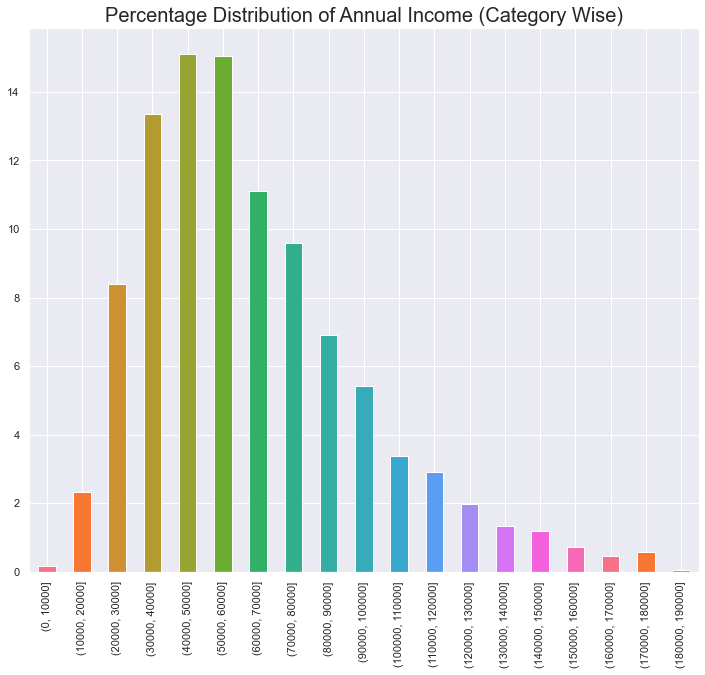

In [67]:
(raw_data.annual_inc_category.value_counts(normalize=True, sort=False)*100).plot.bar(color=sns.color_palette('husl', 16))
plt.title('Percentage Distribution of Annual Income (Category Wise)', fontdict={'fontsize': 20})
plt.show()

### 2.20 Formatting Salary Verification Column (Creating new mapped column)

In [68]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [69]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

##### Creating mapped Salary Verification column, so that numerical operations would be possible (with respect to Salary Verification Column)
##### Note that, mapped values are generic and can be assumed different as well

In [70]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

In [71]:
raw_data['verification_status'].value_counts(sort=False)

Source Verified     9230
Not Verified       14924
Verified           11550
Name: verification_status, dtype: int64

### 2.21 Formatting Loan Issue Date to datetime object & Creating Seperate Column for Month & Year

In [72]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

In [73]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year

In [74]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month

### 2.22 Formatting Loan Status Column (Creating new mapped column) 

In [75]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [76]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

##### Creating mapped Loan Status column, so that numerical operations would be possible (with respect to Loan Status Column)
##### Note that, mapped values are generic and can be assumed different as well

In [77]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

In [78]:
raw_data['loan_status'].value_counts(sort=False)

Current         1042
Charged Off     4874
Fully Paid     29788
Name: loan_status, dtype: int64

### 2.23 Formatting Purpose Column

In [79]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

In [80]:
raw_data['purpose'].value_counts(sort=False)

Wedding                 870
Home Improvement       2575
Major Purchase         1964
Moving                  519
Medical                 616
Renewable Energy         83
Vacation                333
Educational             271
Other                  3502
House                   330
Small Business         1370
Car                    1427
Credit Card            4643
Debt Consolidation    17201
Name: purpose, dtype: int64

### 2.24 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [81]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [82]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

In [83]:
raw_data['addr_state_name'].value_counts(sort=False)

Wisconsin          402
Tennessee           10
Idaho                3
Rhode Island       184
Arizona            767
South Carolina     426
Alabama            410
Vermont             48
Massachusetts     1184
New Mexico         162
California        6407
Kansas             245
North Carolina     692
Louisiana          388
Connecticut        652
Maryland           952
Oklahoma           280
Indiana              1
Delaware           104
Washington         727
Illinois          1392
Michigan           650
Minnesota          558
Georgia           1269
Colorado           693
Montana             73
Oregon             411
New York          3408
New Hampshire      148
Utah               231
Alaska              72
West Virginia      161
Kentucky           305
Missouri           617
Ohio              1125
New Jersey        1666
Hawaii             160
Mississippi         18
Nebraska             1
Pennsylvania      1397
Florida           2567
Iowa                 1
Texas             2453
Nevada     

### 2.25 Creating DTI Category Column & Generating Categorical Column

In [84]:
raw_data['dti'].dtype

dtype('float64')

In [85]:
raw_data['dti'] = round(raw_data['dti'], 2)

##### No need to format DTI Column any much further as it is already in correct format (float value)

In [86]:
dti_range = [*range(math.floor(raw_data['dti'].min()), math.ceil(raw_data['dti'].max() + 1.0), 1)]
raw_data['dti_category'] = pd.cut(raw_data['dti'], dti_range)

In [87]:
raw_data['dti_category'].value_counts(sort=False)

(0, 1]       637
(1, 2]       751
(2, 3]       788
(3, 4]       903
(4, 5]      1097
(5, 6]      1186
(6, 7]      1257
(7, 8]      1448
(8, 9]      1551
(9, 10]     1624
(10, 11]    1739
(11, 12]    1707
(12, 13]    1804
(13, 14]    1878
(14, 15]    1860
(15, 16]    1787
(16, 17]    1738
(17, 18]    1621
(18, 19]    1597
(19, 20]    1604
(20, 21]    1489
(21, 22]    1334
(22, 23]    1355
(23, 24]    1161
(24, 25]    1024
(25, 26]     156
(26, 27]     151
(27, 28]     129
(28, 29]      97
(29, 30]      89
Name: dti_category, dtype: int64

### 2.26 Analysing Delinq 2 Years Column

In [88]:
raw_data['delinq_2yrs'].dtype

dtype('int64')

##### No need to format Delinq 2 Years Column as it is already in correct format (integer value)

### 2.27 Formatting Earliest Credit Line Column to Valid Date object

In [89]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [90]:
raw_data['earliest_cr_line_month'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).month

In [91]:
raw_data['earliest_cr_line_year'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).year

In [92]:
raw_data['earliest_cr_line_year'] = raw_data.earliest_cr_line_year.apply(lambda x: x-100 if (x > pd.datetime.now().year) else x)

##### After converting year to proper format, we should drop 'earliest_cr_line' column to avoid data duplicacy issues.

In [93]:
raw_data = raw_data.drop(columns=['earliest_cr_line'])

In [94]:
raw_data['earliest_cr_line_month'].value_counts(sort=False)

1     3118
2     2560
3     2462
4     2473
5     2599
6     2618
7     2767
8     2984
9     3215
10    3698
11    3562
12    3648
Name: earliest_cr_line_month, dtype: int64

In [95]:
raw_data.groupby(by='earliest_cr_line_year').earliest_cr_line_year.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       1
1965       5
1966       7
1967      11
1968      12
1969      21
1970      35
1971      31
1972      29
1973      40
1974      49
1975      56
1976      68
1977      87
1978     124
1979     132
1980     146
1981     146
1982     185
1983     281
1984     336
1985     392
1986     439
1987     536
1988     640
1989     748
1990     906
1991     837
1992     946
1993    1353
1994    1796
1995    1924
1996    2025
1997    2230
1998    2608
1999    2734
2000    2996
2001    2347
2002    1780
2003    1734
2004    1631
2005    1403
2006    1077
2007     667
2008     142
Name: earliest_cr_line_year, dtype: int64

### 2.28 Formatting Inq 6 Months Column to Valid Date object

In [96]:
raw_data['inq_last_6mths'].dtype

dtype('int64')

##### No need to format Inq Last 6 Months Column as it is already in correct format (integer value)

### 2.29 Formatting Revolving Balance & Generating Categorical Column

In [97]:
raw_data['revol_bal'].dtype

dtype('int64')

##### No need to format Revolving Balance Column as it is in proper format

In [98]:
revol_bal_range = [*range(math.floor(raw_data['revol_bal'].min()), math.ceil(raw_data['revol_bal'].max() + 100.0), 2000)]
raw_data['revol_bal_category'] = pd.cut(raw_data['revol_bal'], revol_bal_range)

In [99]:
raw_data['revol_bal_category'].value_counts()

(0, 2000]           4431
(2000, 4000]        4110
(4000, 6000]        3733
(6000, 8000]        3328
(8000, 10000]       2993
(10000, 12000]      2592
(12000, 14000]      2228
(14000, 16000]      1836
(16000, 18000]      1530
(18000, 20000]      1269
(20000, 22000]       973
(22000, 24000]       868
(24000, 26000]       708
(26000, 28000]       620
(28000, 30000]       486
(30000, 32000]       388
(32000, 34000]       331
(34000, 36000]       301
(38000, 40000]       224
(36000, 38000]       204
(40000, 42000]       161
(44000, 46000]       155
(42000, 44000]       154
(46000, 48000]       124
(52000, 54000]        90
(48000, 50000]        90
(54000, 56000]        80
(50000, 52000]        74
(56000, 58000]        66
(60000, 62000]        57
(58000, 60000]        50
(62000, 64000]        49
(64000, 66000]        42
(66000, 68000]        41
(70000, 72000]        38
(68000, 70000]        38
(72000, 74000]        34
(74000, 76000]        31
(78000, 80000]        30
(80000, 82000]        25


### 2.30 Formatting Revolving Utilization Rate & Generating Categorical Column

In [100]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_cell)

In [101]:
revol_util_range = [*range(math.floor(raw_data['revol_util'].min()), math.ceil(raw_data['revol_util'].max() + 10.0), 10)]
raw_data['revol_util_category'] = pd.cut(raw_data['revol_util'], revol_util_range)

In [102]:
raw_data['revol_util_category'].value_counts(sort=False)

(0, 10]      3060
(10, 20]     2997
(20, 30]     3432
(30, 40]     3715
(40, 50]     3924
(50, 60]     3942
(60, 70]     3919
(70, 80]     3669
(80, 90]     3387
(90, 100]    2837
Name: revol_util_category, dtype: int64

### 2.31 Categorizing Total Number of Credit Lines column

In [103]:
raw_data['total_acc'].dtype

dtype('int64')

##### No need to format Total Number of Credit Lines Column as it is in proper format

In [104]:
total_acc_range = [*range(math.floor(raw_data['total_acc'].min()), math.ceil(raw_data['total_acc'].max() + 10.0), 10)]
raw_data['total_acc_category'] = pd.cut(raw_data['total_acc'], total_acc_range)

In [105]:
raw_data['total_acc_category'].value_counts(sort=False)

(2, 12]      7576
(12, 22]    12820
(22, 32]     9195
(32, 42]     4170
(42, 52]     1419
(52, 62]      420
(62, 72]       95
(72, 82]        6
(82, 92]        2
Name: total_acc_category, dtype: int64

### 2.32 Categorizing Remaining outstanding principal column

In [106]:
raw_data['out_prncp'].dtype

dtype('float64')

##### No need to format Remaining outstanding principal Column as it is in proper format

In [107]:
out_prncp_range = [*range(math.floor(raw_data['out_prncp'].min()), math.ceil(raw_data['out_prncp'].max() + 100.0), 100)]
raw_data['out_prncp_category'] = pd.cut(raw_data['out_prncp'], out_prncp_range)

In [108]:
raw_data['out_prncp_category'].value_counts(sort=False)

(0, 100]        26
(100, 200]      31
(200, 300]      38
(300, 400]      32
(400, 500]      47
(500, 600]      48
(600, 700]      34
(700, 800]      44
(800, 900]      35
(900, 1000]     24
(1000, 1100]    41
(1100, 1200]    36
(1200, 1300]    32
(1300, 1400]    23
(1400, 1500]    21
(1500, 1600]    23
(1600, 1700]    27
(1700, 1800]    34
(1800, 1900]    34
(1900, 2000]    29
(2000, 2100]    20
(2100, 2200]    29
(2200, 2300]    26
(2300, 2400]    24
(2400, 2500]    18
(2500, 2600]    13
(2600, 2700]    18
(2700, 2800]    13
(2800, 2900]    15
(2900, 3000]    18
(3000, 3100]    10
(3100, 3200]    16
(3200, 3300]    17
(3300, 3400]    15
(3400, 3500]    10
(3500, 3600]    10
(3600, 3700]     9
(3700, 3800]    10
(3800, 3900]     7
(3900, 4000]     7
(4000, 4100]    10
(4100, 4200]     6
(4200, 4300]     3
(4300, 4400]     4
(4400, 4500]     7
(4500, 4600]     5
(4600, 4700]     4
(4700, 4800]     4
(4800, 4900]     4
(4900, 5000]     1
(5000, 5100]     1
(5100, 5200]     0
(5200, 5300]

### 2.33 Categorizing Outstanding Principal for Portion of Total Amount Funded by Investors Column

In [109]:
raw_data['out_prncp_inv'].dtype

dtype('float64')

##### No need to format Outstanding Principal for Portion of Total Amount Funded by Investors Column as it is in proper format

In [110]:
out_prncp_inv_range = [*range(math.floor(raw_data['out_prncp_inv'].min()), math.ceil(raw_data['out_prncp_inv'].max() + 100.0), 100)]
raw_data['out_prncp_inv_category'] = pd.cut(raw_data['out_prncp_inv'], out_prncp_inv_range)

In [111]:
raw_data['out_prncp_inv_category'].value_counts(sort=False)

(0, 100]        26
(100, 200]      31
(200, 300]      39
(300, 400]      34
(400, 500]      45
(500, 600]      48
(600, 700]      35
(700, 800]      46
(800, 900]      35
(900, 1000]     23
(1000, 1100]    42
(1100, 1200]    34
(1200, 1300]    34
(1300, 1400]    21
(1400, 1500]    22
(1500, 1600]    24
(1600, 1700]    26
(1700, 1800]    35
(1800, 1900]    32
(1900, 2000]    30
(2000, 2100]    18
(2100, 2200]    35
(2200, 2300]    21
(2300, 2400]    22
(2400, 2500]    18
(2500, 2600]    16
(2600, 2700]    17
(2700, 2800]    11
(2800, 2900]    17
(2900, 3000]    17
(3000, 3100]    10
(3100, 3200]    16
(3200, 3300]    16
(3300, 3400]    16
(3400, 3500]     9
(3500, 3600]    12
(3600, 3700]     8
(3700, 3800]    13
(3800, 3900]     5
(3900, 4000]     5
(4000, 4100]    11
(4100, 4200]     5
(4200, 4300]     3
(4300, 4400]     4
(4400, 4500]     8
(4500, 4600]     5
(4600, 4700]     3
(4700, 4800]     5
(4800, 4900]     3
(4900, 5000]     1
(5000, 5100]     1
(5100, 5200]     2
(5200, 5300]

### 2.34 Analysing Following Columns (if they are needed to format)

In [112]:
raw_data.total_pymnt.dtype

dtype('float64')

In [113]:
raw_data.total_pymnt_inv.dtype

dtype('float64')

In [114]:
raw_data.total_rec_prncp.dtype

dtype('float64')

In [115]:
raw_data.total_rec_int.dtype

dtype('float64')

In [116]:
raw_data.total_rec_late_fee.dtype

dtype('float64')

In [117]:
raw_data.recoveries.dtype

dtype('float64')

In [118]:
raw_data.collection_recovery_fee.dtype

dtype('float64')

**Observation**
- All the above listed columns seems to be in right format, hence no need of any conversion.

### 2.35 Formatting Last Payment & Last Credit Pull Date Column to Valid format

In [119]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [120]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

**Apart from that, we also see that following variables even though are valid, but these factors will not be present when a candidate os applying for loan. Hence, we can drop this following columns:**
- Payments received to date for total amount funded (total_pymnt)
- Payments received to date for portion of total amount funded by investors (total_pymnt_inv)
- Principal received to date (total_rec_prncp)
- Interest received to date (total_rec_int)
- Late fees received to date (total_rec_late_fee)
- Post charge off gross recovery (recoveries)
- Post charge off collection fee (collection_recovery_fee)
- Last month payment was received (last_pymnt_d)
- Last total payment amount received (last_pymnt_amnt)
- Most recent month LC pulled credit for this loan (last_credit_pull_d)

In [121]:
raw_data = raw_data.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                          'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
                         axis=1)

### 2.36 Creating New Column As Percentage of Open Credit Lines Compared With Available Credit Lines

In [122]:
raw_data['ratio_of_credit_line'] = raw_data['open_acc'] / raw_data['total_acc'] * 100

In [123]:
raw_data['ratio_of_credit_line_category'] = raw_data['ratio_of_credit_line'].apply(lambda x: math.ceil(x/5.00) * 5)

### 2.37 Categorising Public Record Column

In [124]:
raw_data['pub_rec'].dtype

dtype('int64')

##### No need to format Public Record Column as it is in proper format

In [125]:
raw_data['pub_rec'].value_counts(sort=False)

0    33833
1     1817
2       46
3        6
4        2
Name: pub_rec, dtype: int64

### 2.38 Categorising Open Credit Line Column

In [126]:
raw_data['open_acc'].dtype

dtype('int64')

##### No need to format Open Credit Column as it is in proper format

In [127]:
raw_data.groupby(by='open_acc').open_acc.count()

open_acc
2      482
3     1300
4     2067
5     2851
6     3568
7     3637
8     3559
9     3390
10    2909
11    2485
12    2067
13    1709
14    1350
15    1066
16     841
17     661
18     486
19     356
20     260
21     224
22     129
23      83
24      65
25      51
26      23
27      19
28      22
29      10
30      12
31       5
32       3
33       3
34       5
35       1
36       2
38       1
39       1
44       1
Name: open_acc, dtype: int64

### 2.39 Categorising Public Record Bankruptcy Column

In [128]:
raw_data['pub_rec_bankruptcies'].dtype

dtype('float64')

In [129]:
raw_data['pub_rec_bankruptcies'] = raw_data['pub_rec_bankruptcies'].apply(lambda x: int(x))

In [130]:
raw_data['pub_rec_bankruptcies'].value_counts(sort=False)

0    34214
1     1483
2        7
Name: pub_rec_bankruptcies, dtype: int64

# ==> 3. Univariate, Segmented & Bivariate Analysis <==

#### For Univariate, Segmented & Bivariate analysis, we will assume only the data relevant to loan status of Fully Paid & Charged Off.
#### Since, we want to compare number of defaulters against the one who have successfully paid, we are dropping the rows relevant to loan status of 'Current'
#### By this way, we will have only 2 types of customers. One which have fully paid & others which are defaulted which will ease out the visualisation of Defaulters against the one who have fully paid.
### Moving ahead, we will focus only on the data relevant to Fully Paid & Charged Off ONLY.

In [131]:
cleaned_data = raw_data.copy(deep=True)

In [132]:
raw_data = raw_data[raw_data['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [133]:
raw_data.shape

(34662, 53)

In [134]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-raw_data.shape[0] / original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 12.73 %


### 3.1 Analysis of "funded_amount" column

#### 3.1.1 Analysing Fully Paid + Charged Off Members

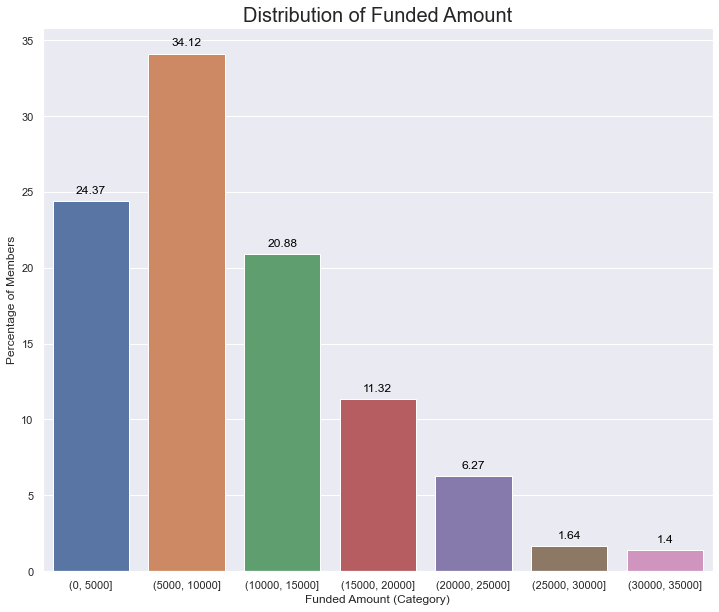

In [135]:
funded_amnt_dist = raw_data.funded_amount_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=funded_amnt_dist.index, y=funded_amnt_dist.values)
plt.title('Distribution of Funded Amount', fontdict={'fontsize': 20})
label_deviation_above_y_axis = funded_amnt_dist.max() * 0.015
for index, value in enumerate(funded_amnt_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Funded Amount (Category)")
plt.ylabel("Percentage of Members")
plt.show()

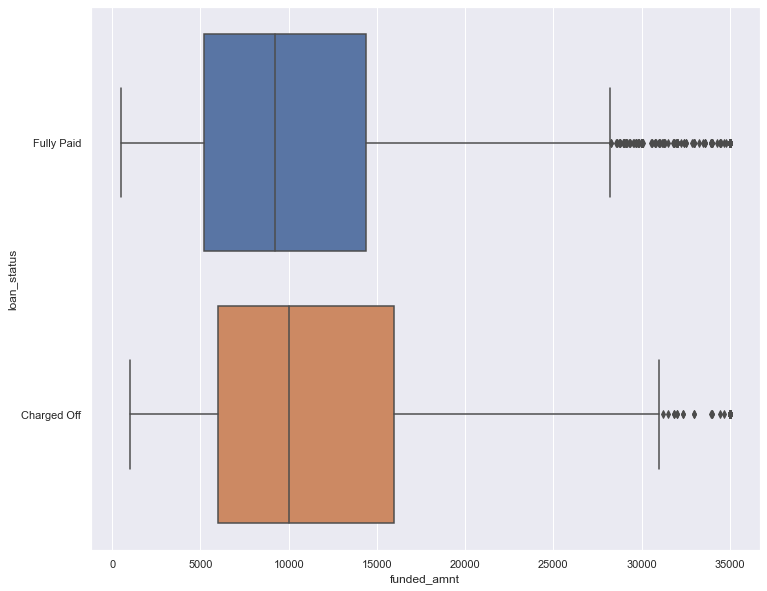

In [136]:
sns.boxplot(x=raw_data['funded_amnt'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [137]:
raw_data.groupby('loan_status')['funded_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4874.0  11804.872794  7649.547537  1000.0  6000.0  10000.0   
Fully Paid   29788.0  10538.142876  6797.983701   500.0  5200.0   9200.0   

                 75%      max  
loan_status                    
Charged Off  16000.0  35000.0  
Fully Paid   14400.0  35000.0

**Observation(s)**
- Majority of Funding Amount is less than USD 16,000
- Overall Funding Amount potray a right skewed (with mean greater than median)
- Distribution is maximum in the range of 5,000 to 10,000 USD

#### 3.1.2 Analysing Charged Off Members Only

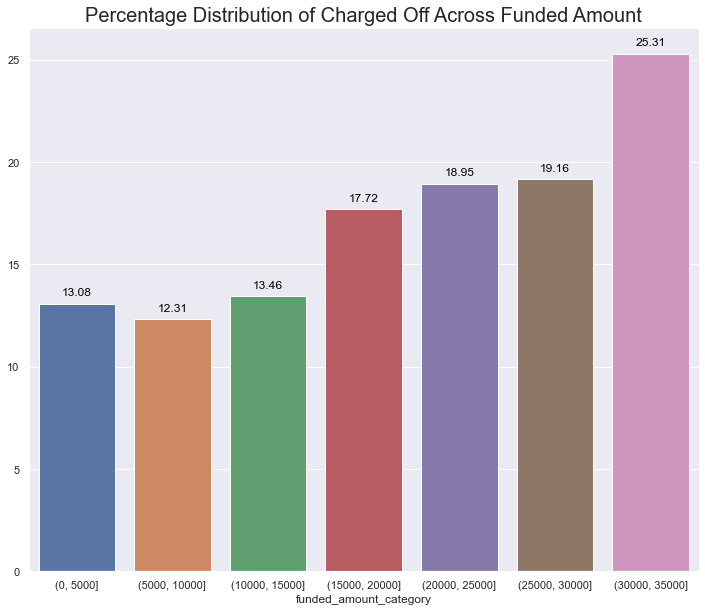

In [138]:
funded_amount_df = raw_data.pivot_table(index='funded_amount_category', columns='loan_status', values='member_id', aggfunc='count')
funded_amount_df['total'] = funded_amount_df.sum(axis=1)
funded_amount_df = funded_amount_df.iloc[:,:-1].div(funded_amount_df["total"], axis=0)*100
chart = sns.barplot(x = funded_amount_df['Charged Off'].index, y=funded_amount_df['Charged Off'].values)
label_deviation_above_y_axis = funded_amount_df['Charged Off'].max() * 0.015
for index, value in enumerate(funded_amount_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Funded Amount", fontdict={'fontsize': 20})
plt.show()
# funded_amount_df

**Observation(s)**
- As the funding amount increases, number of defaulters (charged off) also increases.
- Also, this indicates postive correlation.

##### To verify this, we'll calculate the Correlation Co-efficient to proove this behaviour mathematically.

In [139]:
# headers = ['Funding Amount', 'Charged Off']
# pd.DataFrame(np.corrcoef(funded_amount_df.index, funded_amount_df["Charged Off"]), index=headers, columns=headers)

### 3.2 Analysis of Term column

#### 3.2.1 Analysing Fully Paid + Charged Off Members

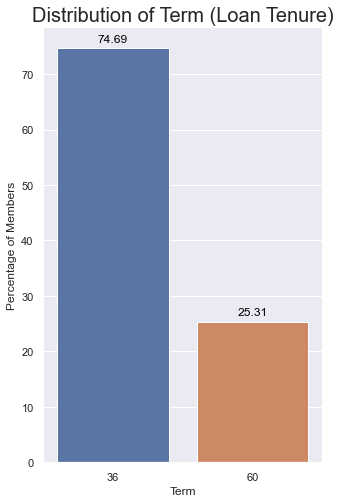

In [140]:
term_dist = raw_data.term.value_counts(normalize=True, sort=False)*100
plt.figure(figsize=(5,8))
graph_1 = sns.barplot(x=term_dist.index, y=term_dist.values)
plt.title('Distribution of Term (Loan Tenure)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = term_dist.max() * 0.015
for index, value in enumerate(term_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Term")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- Almost 3/4th of all the loans, constitute of term equal to 3 Years.
- 

#### 3.2.2 Analysing Charged Off Members Only

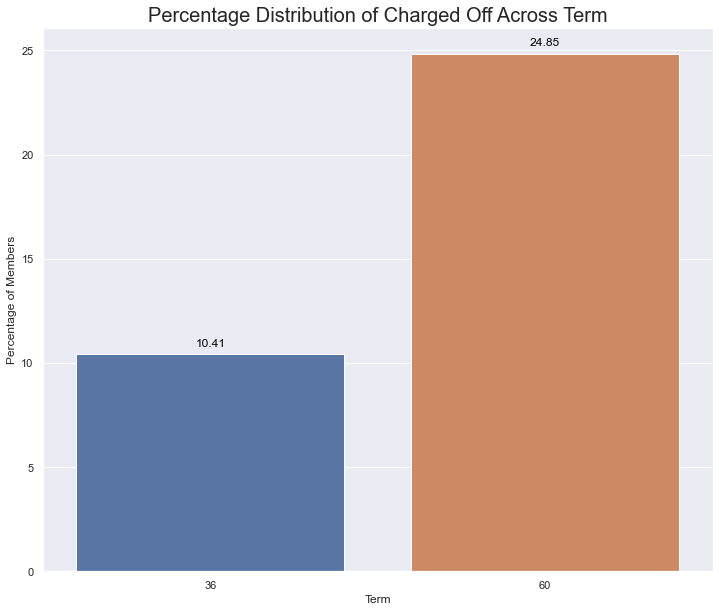

In [141]:
term_df = raw_data.pivot_table(index='term', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
term_df['total'] = term_df.sum(axis=1)
term_df = term_df.iloc[:,:-1].div(term_df["total"], axis=0)*100
chart = sns.barplot(x = term_df['Charged Off'].index, y=term_df['Charged Off'].values)
label_deviation_above_y_axis = term_df['Charged Off'].max() * 0.015
for index, value in enumerate(term_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Term", fontdict={'fontsize': 20})
plt.xlabel("Term")
plt.ylabel("Percentage of Members")
plt.show()
# term_df

**Observation(s)**
- 
- 

### 3.3 Analysis of "Interest Rate" column

#### 3.3.1 Analysing Fully Paid + Charged Off Members

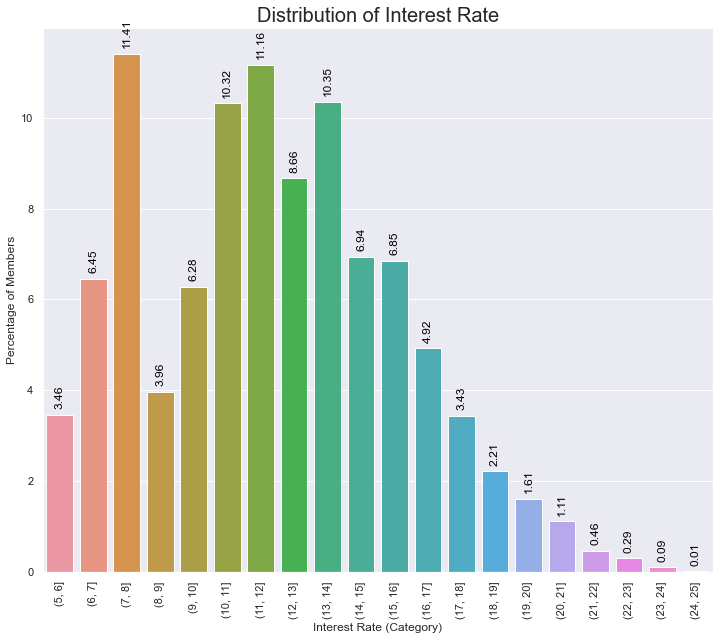

In [142]:
int_rate_dist = raw_data.int_rate_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=int_rate_dist.index, y=int_rate_dist.values)
plt.title('Distribution of Interest Rate', fontdict={'fontsize': 20})
label_deviation_above_y_axis = int_rate_dist.max() * 0.015
for index, value in enumerate(int_rate_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Interest Rate (Category)")
plt.ylabel("Percentage of Members")
plt.show()

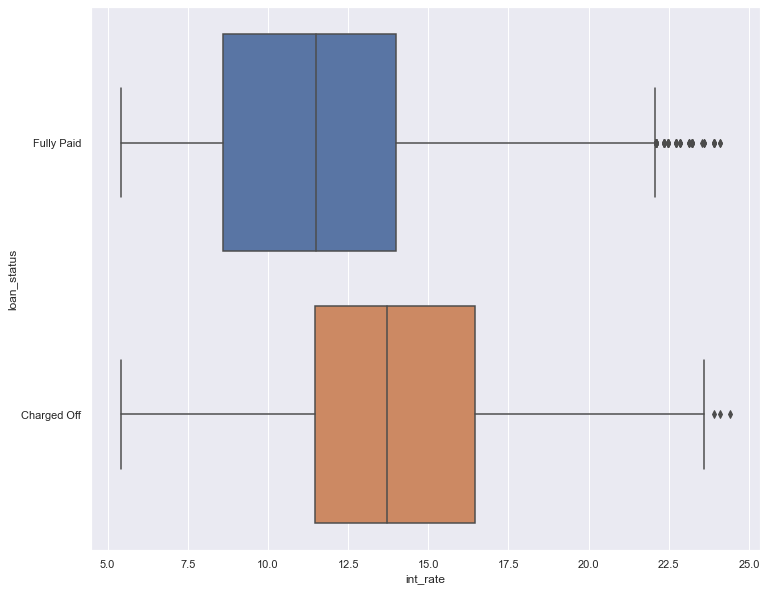

In [143]:
sns.boxplot(x=raw_data['int_rate'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [144]:
raw_data.groupby(['loan_status'])['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4874.0  13.903816  3.637104  5.42  11.48  13.72  16.45  24.40
Fully Paid   29788.0  11.639917  3.600337  5.42   8.59  11.49  13.99  24.11

**Observation**
- We can see that, distribution of interest rate is higher for Charged Off members as compared to Fully Paid members
- Reason might be that, bank wants to recover their amount from interest as quickly as possible, hence they have levied highe interest rate on risky applicants

#### 3.3.2 Analysing Charged Off Members Only

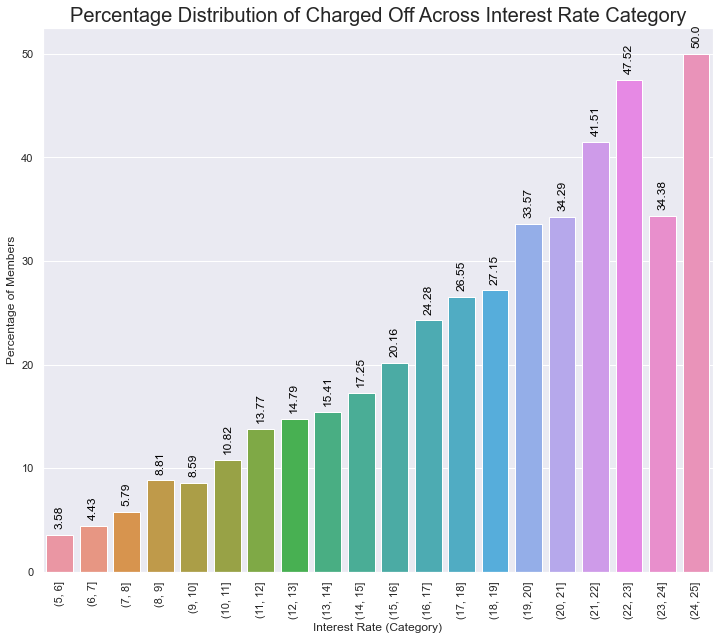

In [145]:
interest_rate_df = raw_data.pivot_table(index='int_rate_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
interest_rate_df['total'] = interest_rate_df.sum(axis=1)
interest_rate_df = interest_rate_df.iloc[:,:-1].div(interest_rate_df["total"], axis=0)*100
chart = sns.barplot(x = interest_rate_df['Charged Off'].index, y=interest_rate_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Interest Rate Category", fontdict={'fontsize': 20})
label_deviation_above_y_axis = interest_rate_df['Charged Off'].max() * 0.015
for index, value in enumerate(interest_rate_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Interest Rate (Category)")
plt.ylabel("Percentage of Members")
plt.show()
# interest_rate_df

**Observation(s)**
- We see that, as the Interest increases, proportion of members getting default also increases.

##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [146]:
# headers = ['Interest Rate', 'Charged Off']
# pd.DataFrame(np.corrcoef(interest_rate_df.index, interest_rate_df["Charged Off"]), index=headers, columns=headers)

### 3.4 Analysis of "Grade" column.

#### 3.4.1 Analysing Fully Paid + Charged Off Members

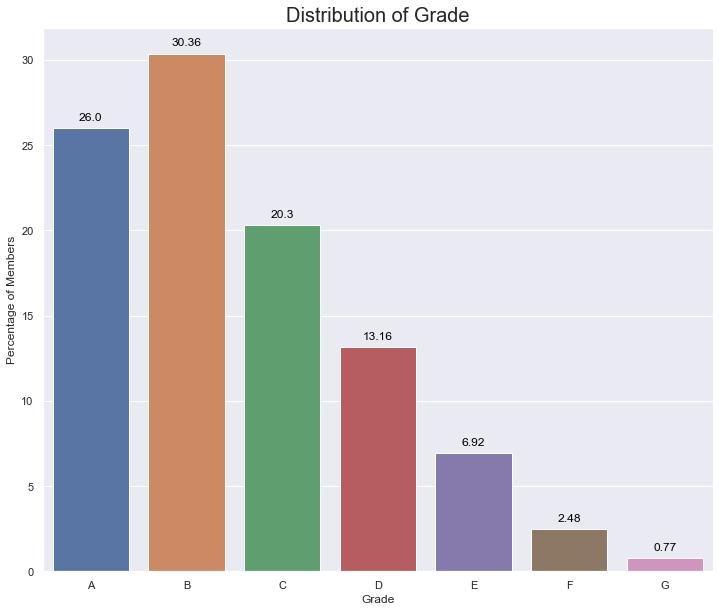

In [147]:
grade_dist = raw_data.groupby(by='grade').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=grade_dist.index, y=grade_dist.values)
plt.title('Distribution of Grade', fontdict={'fontsize': 20})
label_deviation_above_y_axis = grade_dist.max() * 0.015
for index, value in enumerate(grade_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Grade")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.4.2 Analysing Charged Off Members Only

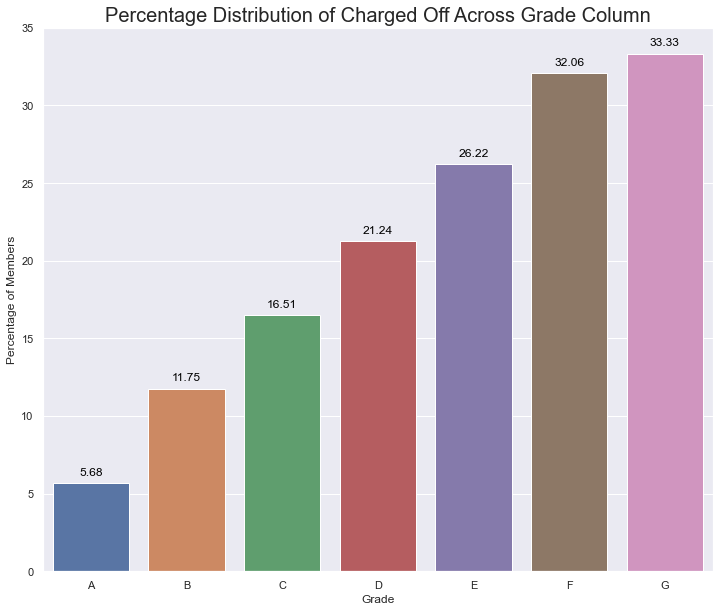

In [148]:
grade_df = raw_data.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
grade_df['total'] = grade_df.sum(axis=1)
grade_df = grade_df.iloc[:,:-1].div(grade_df["total"], axis=0)*100
chart = sns.barplot(x = grade_df['Charged Off'].index, y=grade_df['Charged Off'].values)
chart.set_xticklabels(grade_list, rotation=0)
label_deviation_above_y_axis = grade_df['Charged Off'].max() * 0.015
for index, value in enumerate(grade_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Grade Column", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Percentage of Members")
plt.show()
# grade_df

**Observation**
- Assuming that the grade column has been implemented by the bank, to denote risky applicant, this model can be very much useful in identifying those applicants.
- We can also see that, all the applicants covered under Grade E, F & G are very much risky.

##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.
##### But, before this, we will map the index column which are graded A, B, C etc to numbers like 0, 1, 2 etc.

In [149]:
grade_df['new_index'] = grade_df.index.map(grade_dict_mapped)
grade_df = grade_df.set_index('new_index')

In [150]:
headers = ['Grade (Mapped Value)', 'Charged Off']
pd.DataFrame(np.corrcoef(grade_df.index, grade_df["Charged Off"]), index=headers, columns=headers)

Grade (Mapped Value)  Charged Off
Grade (Mapped Value)              1.000000     0.994032
Charged Off                       0.994032     1.000000

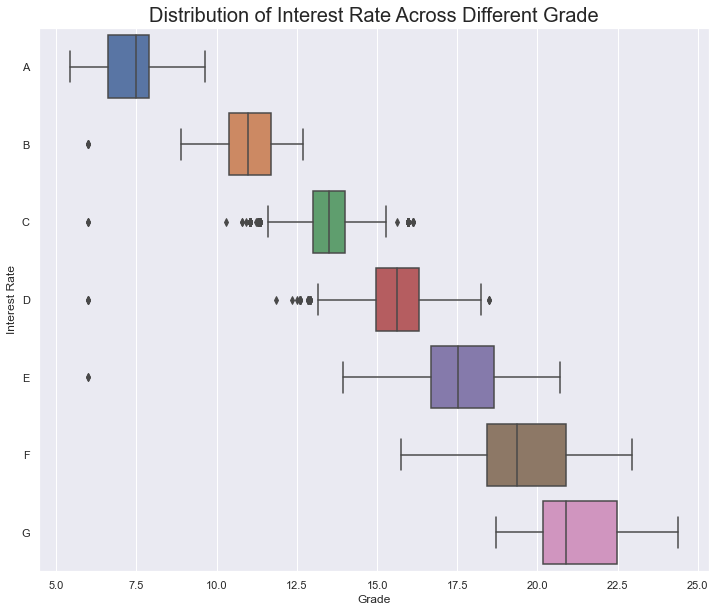

In [151]:
sns.boxplot(raw_data.int_rate, raw_data['grade'], order=['A','B','C','D','E','F','G'])
plt.title("Distribution of Interest Rate Across Different Grade", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

**Observation**
- When Grade Column is plotted against Interest Rate, we ought to observe this behavior wherein majority charged off applicants (which are in Grade G) are levied with higher interest rate to recover the principal amount.

### 3.5 Analysis of "Sub-Grade (Only Numbers)" column

#### 3.5.1 Analysing Fully Paid + Charged Off Members

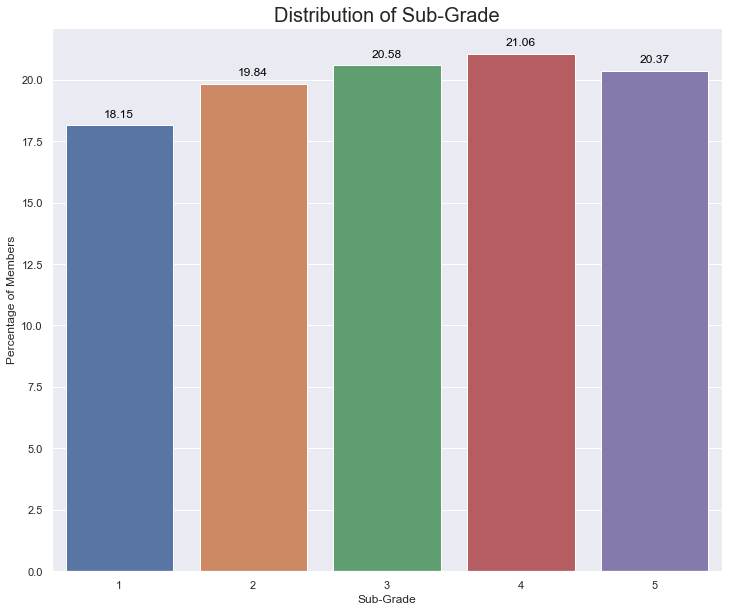

In [152]:
sub_grade_only_number_dist = raw_data.groupby(by='sub_grade_only_number').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=sub_grade_only_number_dist.index, y=sub_grade_only_number_dist.values)
plt.title('Distribution of Sub-Grade', fontdict={'fontsize': 20})
label_deviation_above_y_axis = sub_grade_only_number_dist.max() * 0.015
for index, value in enumerate(sub_grade_only_number_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.5.2 Analysing Charged Off Members Only

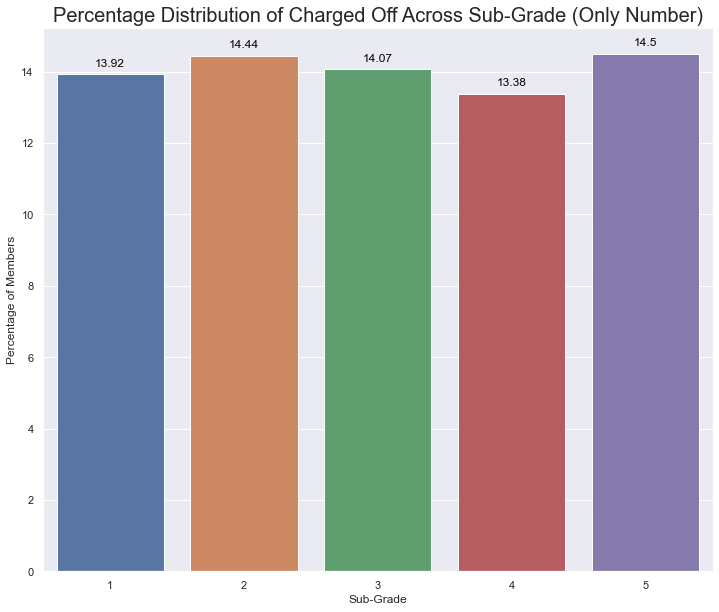

In [153]:
sub_grade_num_df = raw_data.pivot_table(index='sub_grade_only_number', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_num_df['total'] = sub_grade_num_df.sum(axis=1)
sub_grade_num_df = sub_grade_num_df.iloc[:,:-1].div(sub_grade_num_df["total"], axis=0)*100
chart = sns.barplot(x = sub_grade_num_df['Charged Off'].index, y=sub_grade_num_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
label_deviation_above_y_axis = sub_grade_num_df['Charged Off'].max() * 0.015
for index, value in enumerate(sub_grade_num_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Sub-Grade (Only Number)", fontdict={'fontsize': 20})
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()
# sub_grade_num_df

**Observations**
- On comparing the entire data consisting of both Fully Paid & Charged Off, we see that as the Sub-Grade number increases, percentage also increases although slightly.
- But, when taking into considertion the 'Charged Off' data only, we dont see any considerable change or a pattern. So, we can neglect making use of Sub-Grade Numbers Only

##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [154]:
headers = ['Grade (Mapped Value)', 'Charged Off']
pd.DataFrame(np.corrcoef(sub_grade_num_df.index, sub_grade_num_df["Charged Off"]), index=headers, columns=headers)

Grade (Mapped Value)  Charged Off
Grade (Mapped Value)              1.000000     0.033973
Charged Off                       0.033973     1.000000

#### Since, the correlation value are very small (almsot equal to 0), we can say that only Sub-Grade Numbers Only have no relation with Charged Off Percent as a standalone variable.

### 3.6 Analysis of "Sub-Grade" columns

#### 3.6.1 Analysing Fully Paid + Charged Off Members

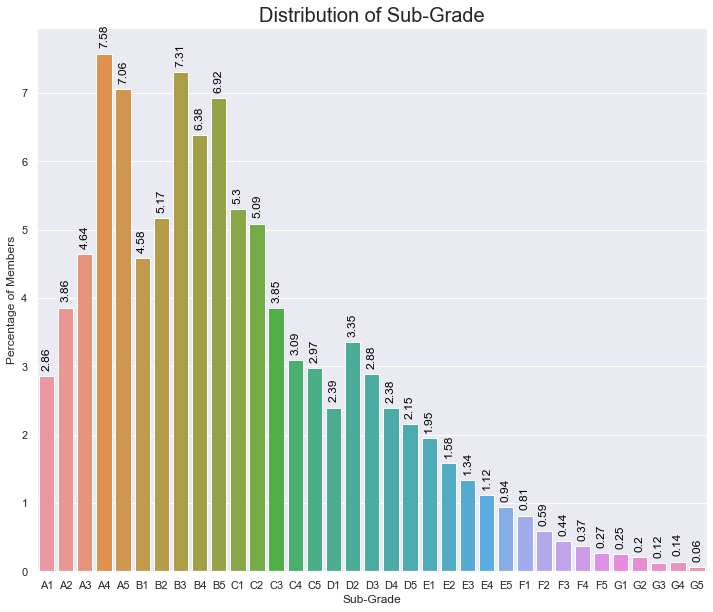

In [155]:
sub_grade_dist = raw_data.groupby(by='sub_grade').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=sub_grade_dist.index, y=sub_grade_dist.values)
plt.title('Distribution of Sub-Grade', fontdict={'fontsize': 20})
label_deviation_above_y_axis = sub_grade_dist.max() * 0.015
for index, value in enumerate(sub_grade_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.6.2 Analysing Charged Off Members Only

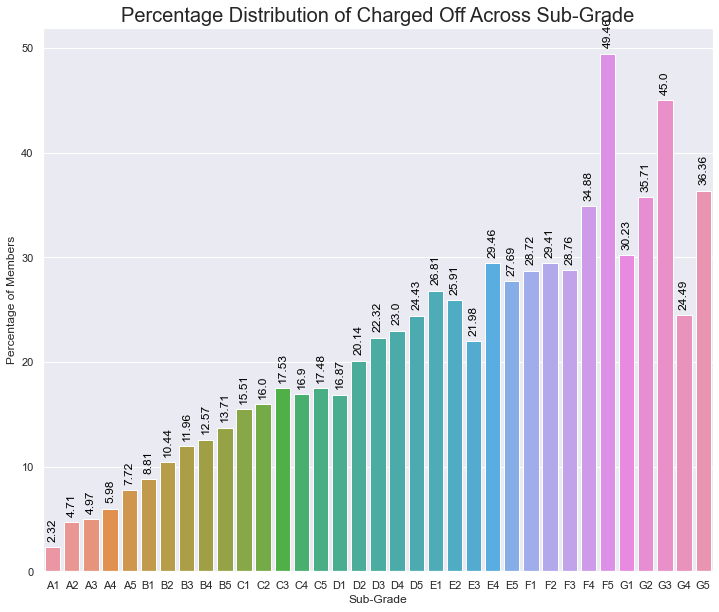

In [156]:
sub_grade_df = raw_data.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_df['total'] = sub_grade_df.sum(axis=1)
sub_grade_df = sub_grade_df.iloc[:,:-1].div(sub_grade_df["total"], axis=0)*100
chart = sns.barplot(x = sub_grade_df['Charged Off'].index, y=sub_grade_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = sub_grade_df['Charged Off'].max() * 0.015
for index, value in enumerate(sub_grade_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')

plt.title("Percentage Distribution of Charged Off Across Sub-Grade", fontdict={'fontsize': 20})
plt.xlabel("Sub-Grade")
plt.ylabel("Percentage of Members")
plt.show()
# sub_grade_df

**Observations**
- On comparing the entire data consisting of both Fully Paid & Charged Off, we see that as the Sub-Grade moves from (A1-->A2-->A3-->) uptil (-->G3-->G4-->G5), percentage also decreases.
- But, when taking into considertion the 'Charged Off' data only, we see an increasing pattern.
- With this again, assuming that the sub-grade column has been implemented by the bank, to denote risky applicant, this model can be very much useful in identifying those risky applicants.

##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.
##### But, before this, we will map the index column which are graded A1, A2, A3 etc to numbers like 0, 1, 2 etc.

In [157]:
sub_grade_mapped_dict = {value: index for index, value in enumerate(sub_grade_df.index)}

In [158]:
sub_grade_df['new_index'] = sub_grade_df.index.map(sub_grade_mapped_dict)
sub_grade_df = sub_grade_df.set_index('new_index')

In [159]:
headers = ['Sub-Grade', 'Charged Off']
pd.DataFrame(np.corrcoef(sub_grade_df.index, sub_grade_df["Charged Off"]), index=headers, columns=headers)

Sub-Grade  Charged Off
Sub-Grade     1.000000     0.930495
Charged Off   0.930495     1.000000

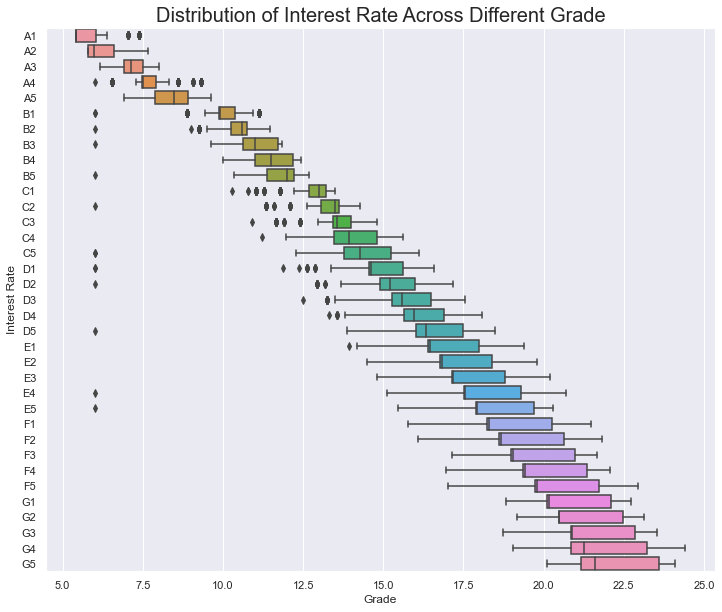

In [160]:
sns.boxplot(raw_data.int_rate, raw_data['sub_grade'], order=list(raw_data.groupby(by='sub_grade').sub_grade.count().index))
plt.title("Distribution of Interest Rate Across Different Grade", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

**Observation**
- When Sub-Grade Column is plotted against Interest Rate, we ought to observe this behavior wherein majority charged off applicants are levied with higher interest rate to recover the principal amount

### 3.7 Analysis of "Employee Title" column

#### 3.7.1 Analysing Fully Paid + Charged Off Members

In [161]:
raw_data.emp_title.value_counts().head(10)

us army              284
self employed        131
bank of america      129
us air force         114
walmart              107
us postal service    106
at&t                  87
jp morgan chase       83
us navy               77
kaiser permanente     66
Name: emp_title, dtype: int64

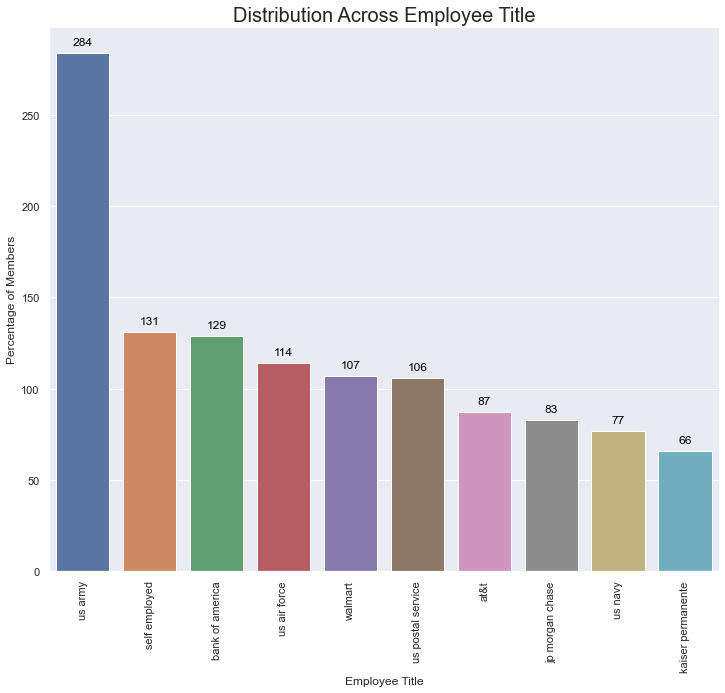

In [162]:
emp_title_dist = raw_data.emp_title.value_counts().head(10)
graph_1 = sns.barplot(x=emp_title_dist.index, y=emp_title_dist.values)
plt.title('Distribution Across Employee Title', fontdict={'fontsize': 20})
label_deviation_above_y_axis = emp_title_dist.max() * 0.015
for index, value in enumerate(emp_title_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Employee Title")
plt.ylabel("Percentage of Members")
plt.show()

**Observation**
- 
- 

#### 3.7.2 Analysing Charged Off Members Only

##### We will try to count percentage of charged off members for every Employee Title, to identfy risky applicants connected to specific Employee Title

In [163]:
ser_1 = raw_data[raw_data['loan_status'] == 'Fully Paid'].emp_title.value_counts()
ser_1 = ser_1.rename('fully_paid_count')
ser_2 = raw_data[raw_data['loan_status'] == 'Charged Off'].emp_title.value_counts()
ser_2 = ser_2.rename('charged_off_count')
emp_title_df = pd.concat([ser_1, ser_2], axis=1)
emp_title_df['total_count'] = emp_title_df['charged_off_count']+emp_title_df['fully_paid_count']
emp_title_df['charged_off_percent'] = round(emp_title_df['charged_off_count'] / emp_title_df['total_count'] * 100, 2)
emp_title_df = emp_title_df.sort_values('charged_off_percent', ascending=False)
emp_title_df = emp_title_df[emp_title_df['total_count'] > 10].head(25)

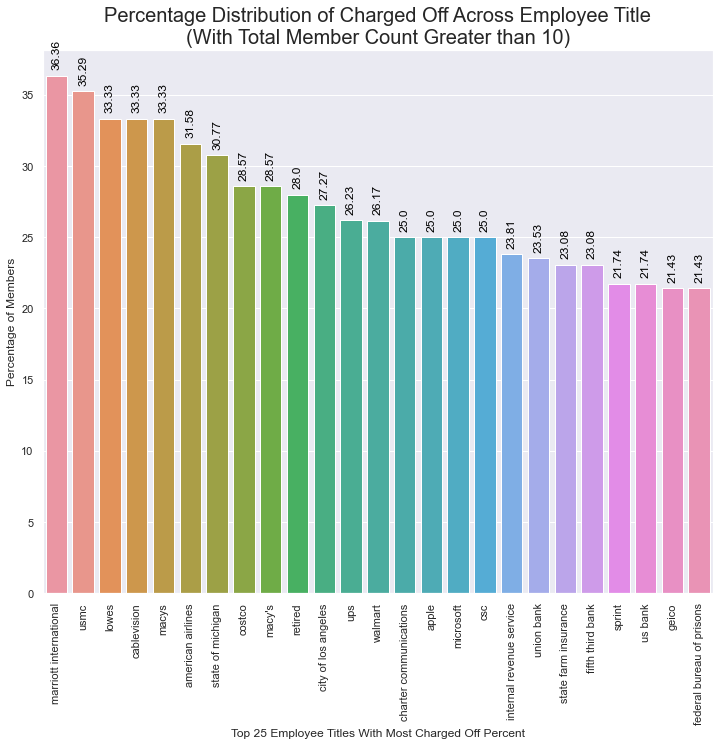

In [164]:
chart = sns.barplot(x = emp_title_df['charged_off_percent'].index, y=emp_title_df['charged_off_percent'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
label_deviation_above_y_axis = emp_title_df['charged_off_percent'].max() * 0.015
for index, value in enumerate(emp_title_df['charged_off_percent'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Top 25 Employee Titles With Most Charged Off Percent")
plt.ylabel("Percentage of Members")
plt.title("Percentage Distribution of Charged Off Across Employee Title\n(With Total Member Count Greater than 10)", fontdict={'fontsize': 20})
plt.show()

**Observation(s)**
- 
- 

### 3.8 Analysis of "Employee Length" column

#### 3.8.1 Analysing Fully Paid + Charged Off Members

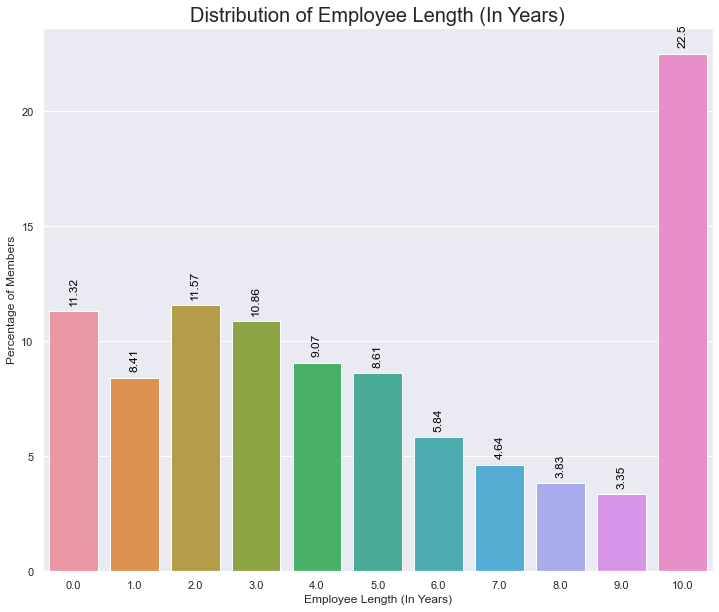

In [165]:
emp_length_dist = raw_data.groupby(by='emp_length').grade.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=emp_length_dist.index, y=emp_length_dist.values)
plt.title('Distribution of Employee Length (In Years)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = emp_length_dist.max() * 0.015
for index, value in enumerate(emp_length_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Employee Length (In Years)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation**
- Considering Univariate Analysis of Employee Length column, percentage of members decreases as Employee Increases.
- Here we see a sharp increase in Employee Length of more than 10 years. However, the reason behind this can be, clubbing of all the employee length into one group. (i.e. 10, 11, 12, 13 etc. all in one group)

#### 3.8.2 Analysing Charged Off Members Only

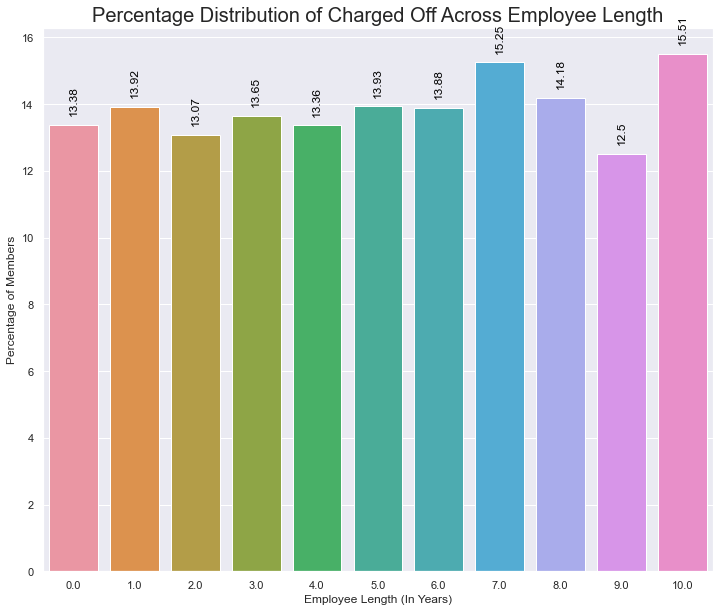

In [166]:
emp_len_df = raw_data.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
emp_len_df['total'] = emp_len_df.sum(axis=1)
emp_len_df = emp_len_df.iloc[:,:-1].div(emp_len_df["total"], axis=0)*100
chart = sns.barplot(x = emp_len_df['Charged Off'].index, y=emp_len_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
for index, value in enumerate(emp_len_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Employee Length (In Years)")
plt.ylabel("Percentage of Members")
plt.title("Percentage Distribution of Charged Off Across Employee Length", fontdict={'fontsize': 20})
plt.show()
# emp_len_df

**Observation**
- We see that, as the Employee Length increases, proportion of members getting default also increases although the increase is very small.

##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [167]:
# headers = ['Employee Length', 'Charged Off']
# pd.DataFrame(np.corrcoef(emp_len_df.index, emp_len_df["Charged Off"]), index=headers, columns=headers)

### 3.9 Analysis of "Home Ownership" column

#### 3.9.1 Analysing Fully Paid + Charged Off Members

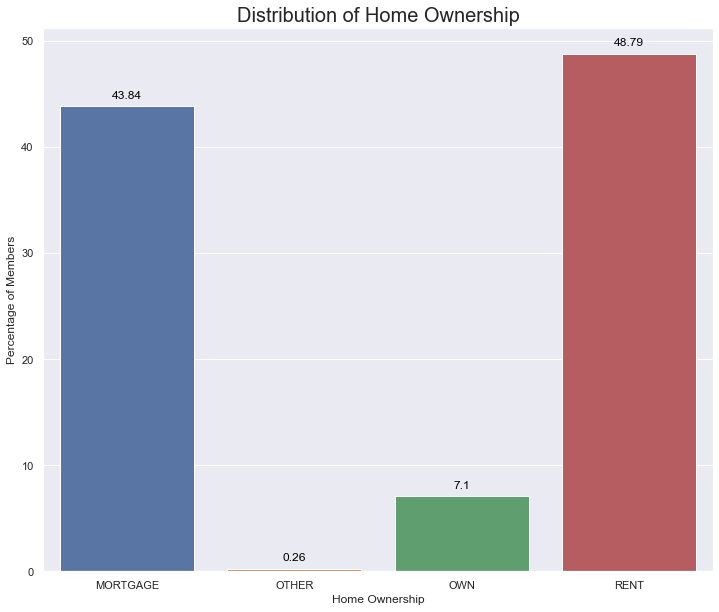

In [168]:
home_ownership_dist = raw_data.groupby(by='home_ownership').grade.count() / len(raw_data) * 100
home_ownership_dist = home_ownership_dist.sort_index()
graph_1 = sns.barplot(x=home_ownership_dist.index, y=home_ownership_dist.values)
plt.title('Distribution of Home Ownership', fontdict={'fontsize': 20})
label_deviation_above_y_axis = home_ownership_dist.max() * 0.015
for index, value in enumerate(home_ownership_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Home Ownership")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.9.2 Analysing Charged Off Members Only

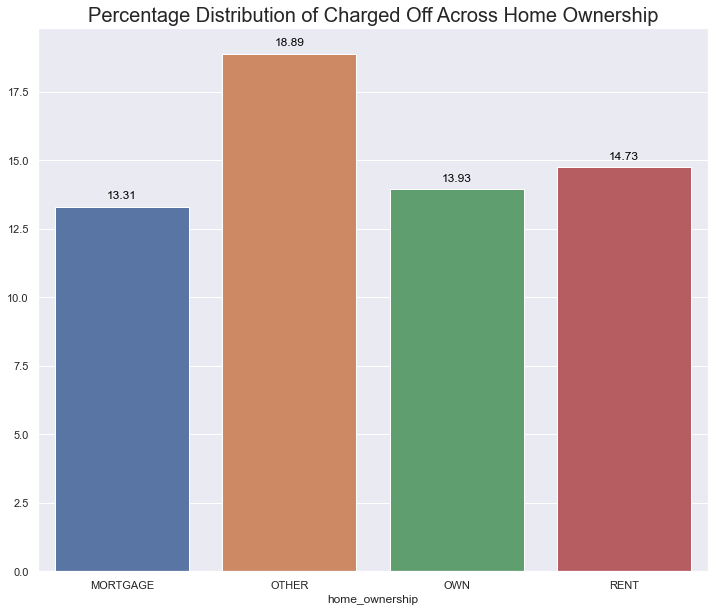

In [169]:
home_own_df = raw_data.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
home_own_df['total'] = home_own_df.sum(axis=1)
home_own_df = home_own_df.iloc[:,:-1].div(home_own_df["total"], axis=0)*100
home_own_df = home_own_df.sort_index()
chart = sns.barplot(x = home_own_df['Charged Off'].index, y=home_own_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = home_own_df['Charged Off'].max() * 0.015
for index, value in enumerate(home_own_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")

plt.title("Percentage Distribution of Charged Off Across Home Ownership", fontdict={'fontsize': 20})
plt.show()
# home_own_df

### 3.10 Analysis of "Annual Income" column

#### 3.10.1 Analysing Fully Paid + Charged Off Members

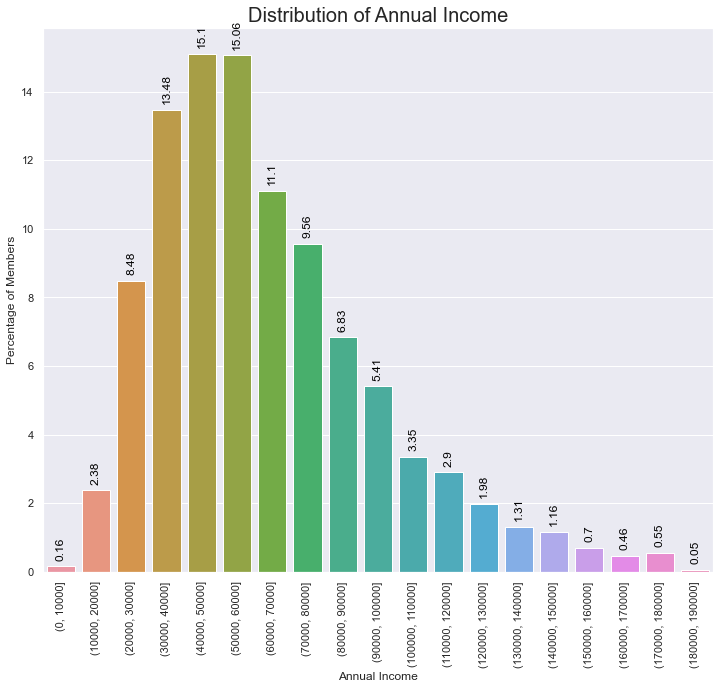

In [170]:
annual_inc_dist = raw_data.annual_inc_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=annual_inc_dist.index, y=annual_inc_dist.values)
plt.title('Distribution of Annual Income', fontdict={'fontsize': 20})
label_deviation_above_y_axis = annual_inc_dist.max() * 0.015
for index, value in enumerate(annual_inc_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Annual Income")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.10.2 Analysing Charged Off Members Only

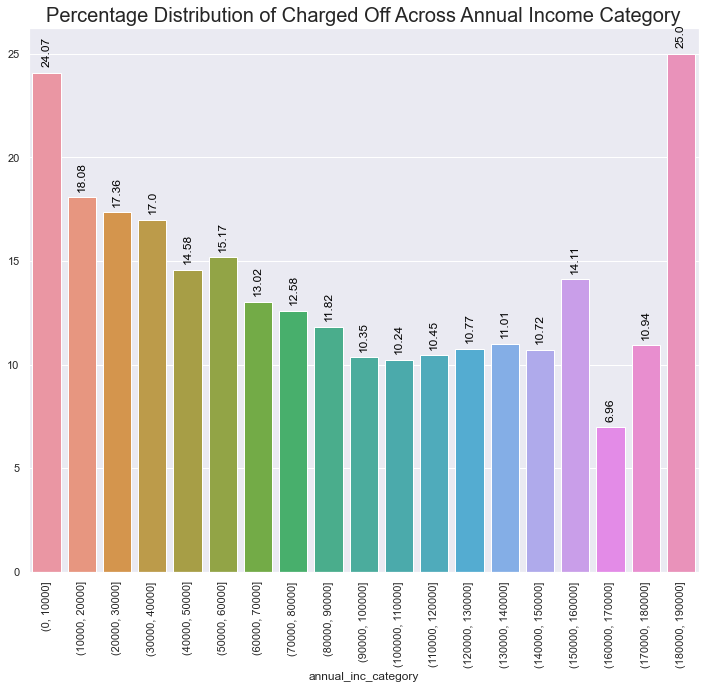

In [171]:
income_df = raw_data.pivot_table(index='annual_inc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
income_df['total'] = income_df.sum(axis=1)
income_df = income_df.iloc[:,:-1].div(income_df["total"], axis=0)*100
chart = sns.barplot(x = income_df['Charged Off'].index, y=income_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

label_deviation_above_y_axis = income_df['Charged Off'].max() * 0.015
for index, value in enumerate(income_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')

plt.title("Percentage Distribution of Charged Off Across Annual Income Category", fontdict={'fontsize': 20})
plt.show()
# income_df

**Observation**
- We see that, as the Annual Income increases, proportion of members getting default decreases.

### 3.11 Analysis of "Income Verification Status" column

#### 3.11.1 Analysing Fully Paid + Charged Off Members

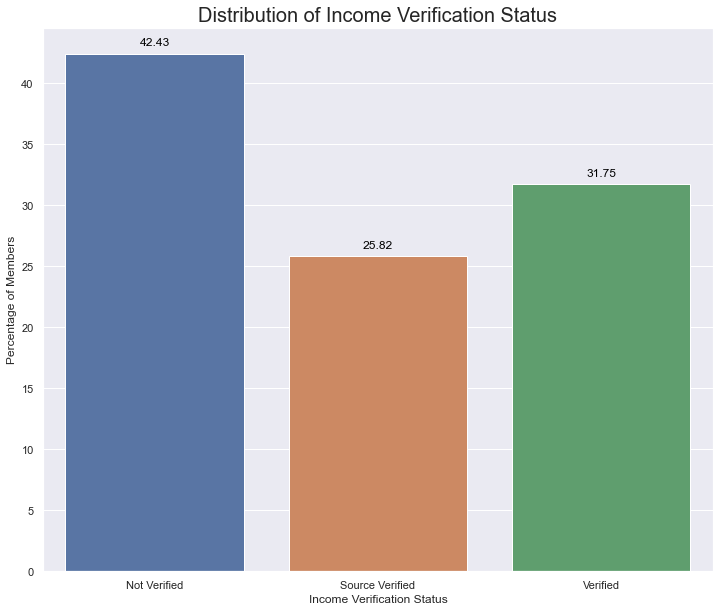

In [172]:
verification_status_dist = raw_data.groupby(by='verification_status').grade.count() / len(raw_data) * 100
verification_status_dist = verification_status_dist.sort_index()
graph_1 = sns.barplot(x=verification_status_dist.index, y=verification_status_dist.values)
plt.title('Distribution of Income Verification Status', fontdict={'fontsize': 20})
label_deviation_above_y_axis = verification_status_dist.max() * 0.015
for index, value in enumerate(verification_status_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Income Verification Status")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.11.2 Analysing Charged Off Members Only

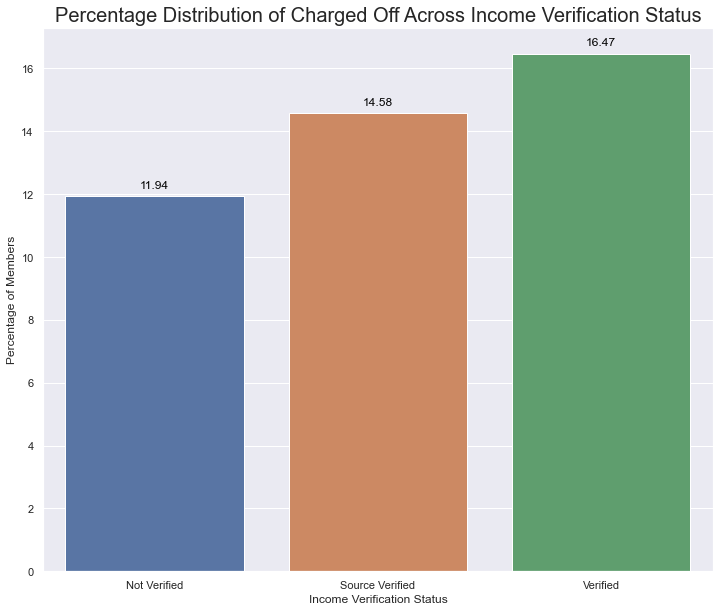

In [173]:
inc_ver_df = raw_data.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
inc_ver_df['total'] = inc_ver_df.sum(axis=1)
inc_ver_df = inc_ver_df.iloc[:,:-1].div(inc_ver_df["total"], axis=0)*100
chart = sns.barplot(x = inc_ver_df['Charged Off'].index, y=inc_ver_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = inc_ver_df['Charged Off'].max() * 0.015
for index, value in enumerate(inc_ver_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")

plt.title("Percentage Distribution of Charged Off Across Income Verification Status", fontdict={'fontsize': 20})
plt.xlabel("Income Verification Status")
plt.ylabel("Percentage of Members")
plt.show()
# inc_ver_df

**Observation(s)**
- 
- 

### 3.12 Analysis of "Issue Date (Year)" column

#### 3.12.1 Analysing Fully Paid + Charged Off Members

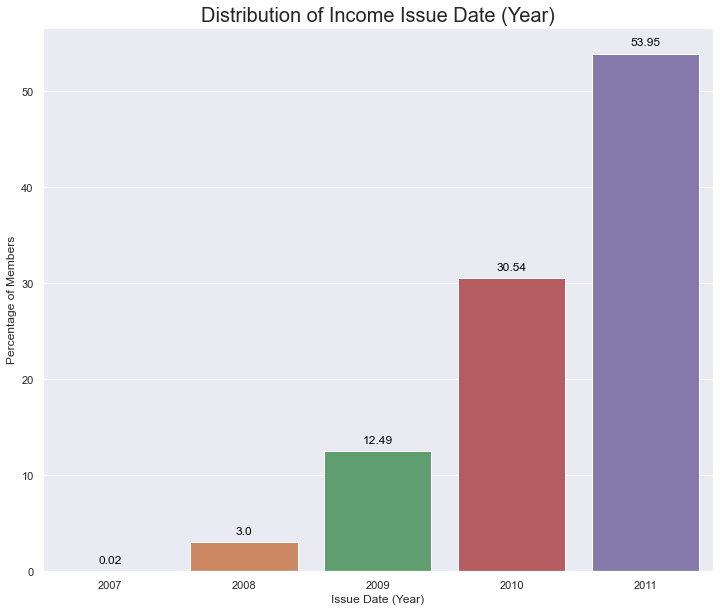

In [174]:
issue_d_year_dist = raw_data.issue_d_year.value_counts(normalize=True, sort=False)*100
issue_d_year_dist = issue_d_year_dist.sort_index()
graph_1 = sns.barplot(x=issue_d_year_dist.index, y=issue_d_year_dist.values)
plt.title('Distribution of Income Issue Date (Year)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = issue_d_year_dist.max() * 0.015
for index, value in enumerate(issue_d_year_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Issue Date (Year)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.12.2 Analysing Charged Off Members Only

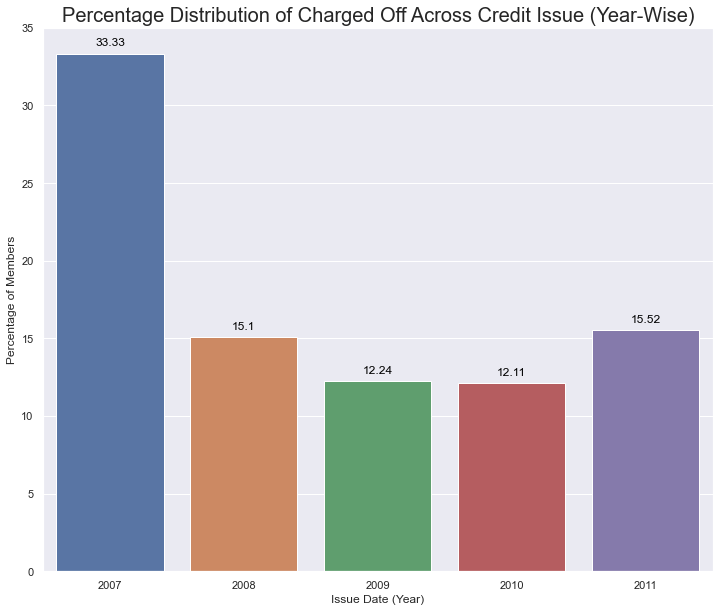

In [175]:
issue_d_year_df = raw_data.pivot_table(index='issue_d_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_year_df['total'] = issue_d_year_df.sum(axis=1)
issue_d_year_df = issue_d_year_df.iloc[:,:-1].div(issue_d_year_df["total"], axis=0)*100
chart = sns.barplot(x = issue_d_year_df['Charged Off'].index, y=issue_d_year_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = issue_d_year_df['Charged Off'].max() * 0.015
for index, value in enumerate(issue_d_year_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")

plt.title("Percentage Distribution of Charged Off Across Credit Issue (Year-Wise)", fontdict={'fontsize': 20})
plt.xlabel("Issue Date (Year)")
plt.ylabel("Percentage of Members")
plt.show()
# issue_d_year_df

**Observation**
- 2007 is having maximum percentage of default loans
- As the years are crossing by, defaulter list is decreasing. This means, bank officials are adopting better techniques on identifying the defaulters.

### 3.13 Analysis of "Issue Date (Month)" column

#### 3.13.1 Analysing Fully Paid + Charged Off Members

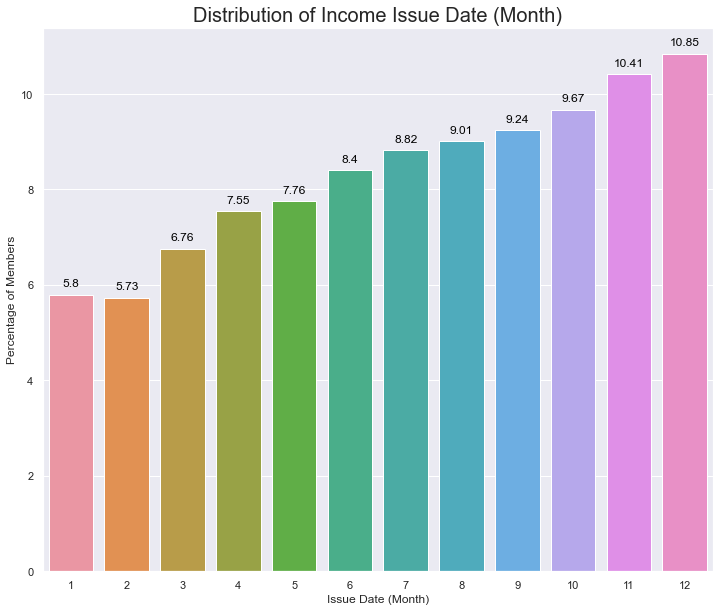

In [176]:
issue_d_month_dist = raw_data.issue_d_month.value_counts(normalize=True, sort=False)*100
issue_d_month_dist = issue_d_month_dist.sort_index()
graph_1 = sns.barplot(x=issue_d_month_dist.index, y=issue_d_month_dist.values)
plt.title('Distribution of Income Issue Date (Month)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = issue_d_month_dist.max() * 0.015
for index, value in enumerate(issue_d_month_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Issue Date (Month)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.13.2 Analysing Charged Off Members Only

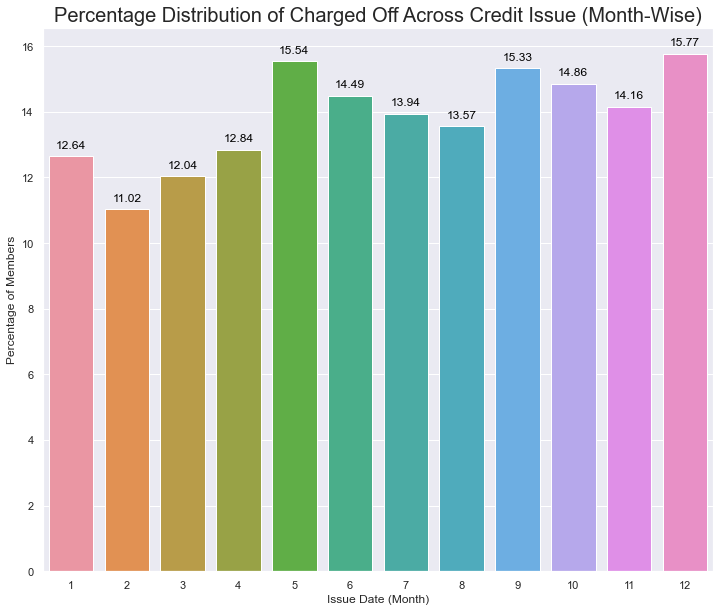

In [177]:
issue_d_mon_df = raw_data.pivot_table(index='issue_d_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_mon_df['total'] = issue_d_mon_df.sum(axis=1)
issue_d_mon_df = issue_d_mon_df.iloc[:,:-1].div(issue_d_mon_df["total"], axis=0)*100
chart = sns.barplot(x = issue_d_mon_df['Charged Off'].index, y=issue_d_mon_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = issue_d_mon_df['Charged Off'].max() * 0.015
for index, value in enumerate(issue_d_mon_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Month-Wise)", fontdict={'fontsize': 20})
plt.xlabel("Issue Date (Month)")
plt.ylabel("Percentage of Members")
plt.show()
# issue_d_mon_df

**Observation(s)**
- 
- 

### 3.14 Analysis of "Purpose" column

#### 3.14.1 Analysing Fully Paid + Charged Off Members

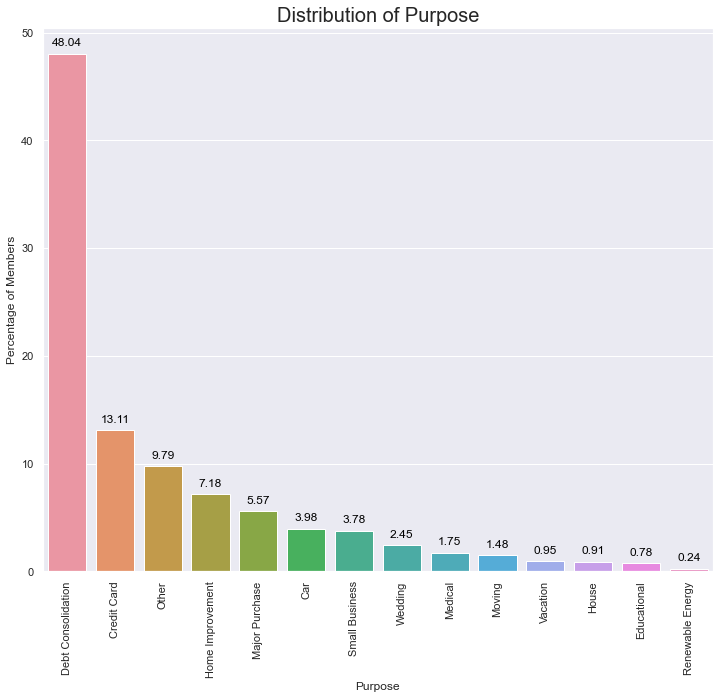

In [178]:
purpose_dist = raw_data.purpose.value_counts(normalize=True, sort=True)*100
graph_1 = sns.barplot(x=purpose_dist.index, y=purpose_dist.values)
plt.title('Distribution of Purpose', fontdict={'fontsize': 20})
label_deviation_above_y_axis = purpose_dist.max() * 0.015
for index, value in enumerate(purpose_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Purpose")
plt.ylabel("Percentage of Members")
plt.show()

**Observation**
- This column has total count of 34662, has unique values 17352, top title frequency is of 'Debt Consolidation'.
- This column does not add any value to desicion making of Default/non-default loan status.

#### 3.14.2 Analysing Charged Off Members Only

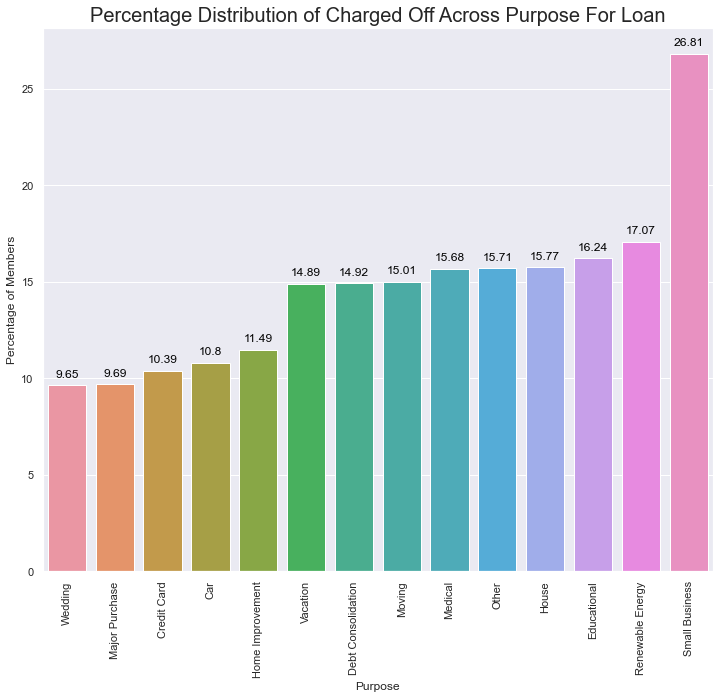

In [179]:
purpose_df = raw_data.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
purpose_df['total'] = purpose_df.sum(axis=1)
purpose_df = purpose_df.iloc[:,:-1].div(purpose_df["total"], axis=0)*100
purpose_df = purpose_df.sort_values(by=['Charged Off'])
chart = sns.barplot(x = purpose_df['Charged Off'].index, y=purpose_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
label_deviation_above_y_axis = purpose_df['Charged Off'].max() * 0.015
for index, value in enumerate(purpose_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.title("Percentage Distribution of Charged Off Across Purpose For Loan", fontdict={'fontsize': 20})
plt.xlabel("Purpose")
plt.ylabel("Percentage of Members")
plt.show()
# purpose_df

**Observation(s)**
- 
- 

### 3.15 Analysis of "State" column

#### 3.15.1 Analysing Fully Paid + Charged Off Members

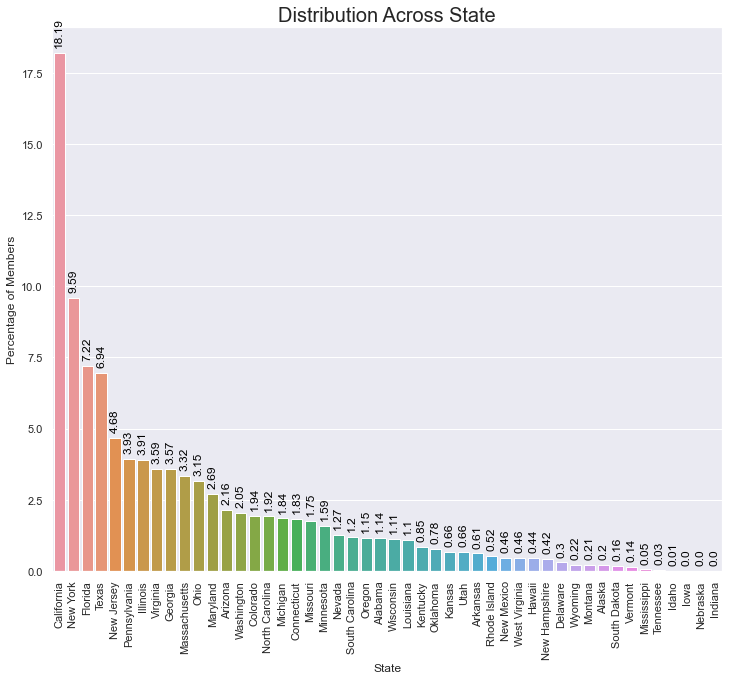

In [180]:
addr_state_name_dist = raw_data.addr_state_name.value_counts(normalize=True, sort=True)*100
graph_1 = sns.barplot(x=addr_state_name_dist.index, y=addr_state_name_dist.values)
plt.title('Distribution Across State', fontdict={'fontsize': 20})
label_deviation_above_y_axis = addr_state_name_dist.max() * 0.015
for index, value in enumerate(addr_state_name_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("State")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.15.2 Analysing Charged Off Members Only

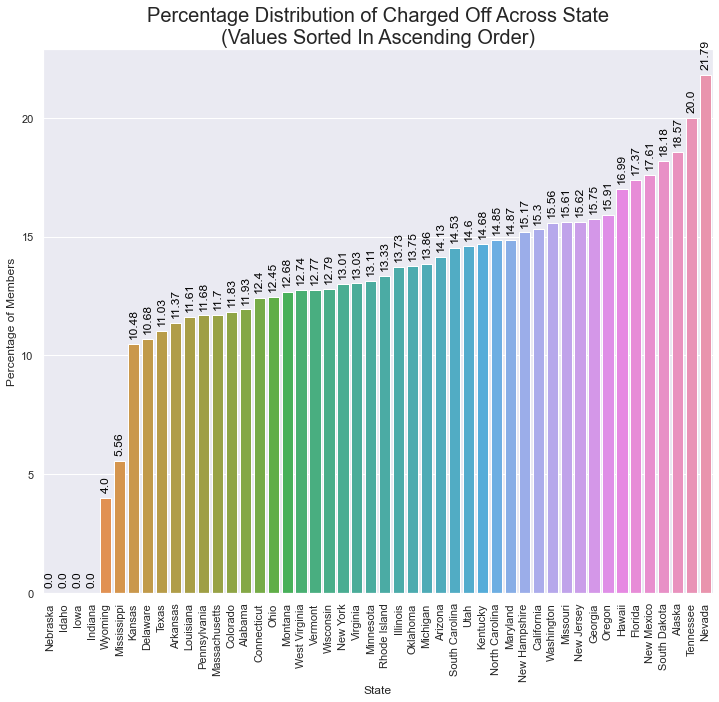

In [181]:
state_df = raw_data.pivot_table(index='addr_state_name', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
state_df['total'] = state_df.sum(axis=1)
state_df = state_df.iloc[:,:-1].div(state_df["total"], axis=0)*100
state_df = state_df.sort_values(by=['Charged Off'])
chart = sns.barplot(x = state_df['Charged Off'].index, y=state_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

label_deviation_above_y_axis = state_df['Charged Off'].max() * 0.015
for index, value in enumerate(state_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("State")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across State\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 20})
plt.show()
# state_df

In [182]:
Image(url="state_wise_charged_off.png")

**Observation(s)**
- 
- 

### 3.16 Analysis of "DTI" column

#### 3.16.1 Analysing Fully Paid + Charged Off Members

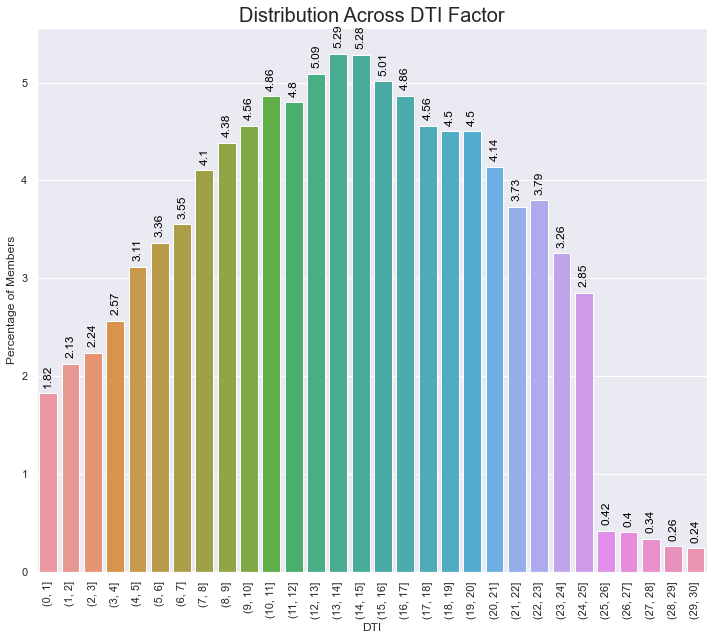

In [183]:
dti_category_dist = raw_data.dti_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=dti_category_dist.index, y=dti_category_dist.values)
plt.title('Distribution Across DTI Factor', fontdict={'fontsize': 20})
label_deviation_above_y_axis = dti_category_dist.max() * 0.015
for index, value in enumerate(dti_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("DTI")
plt.ylabel("Percentage of Members")
plt.show()

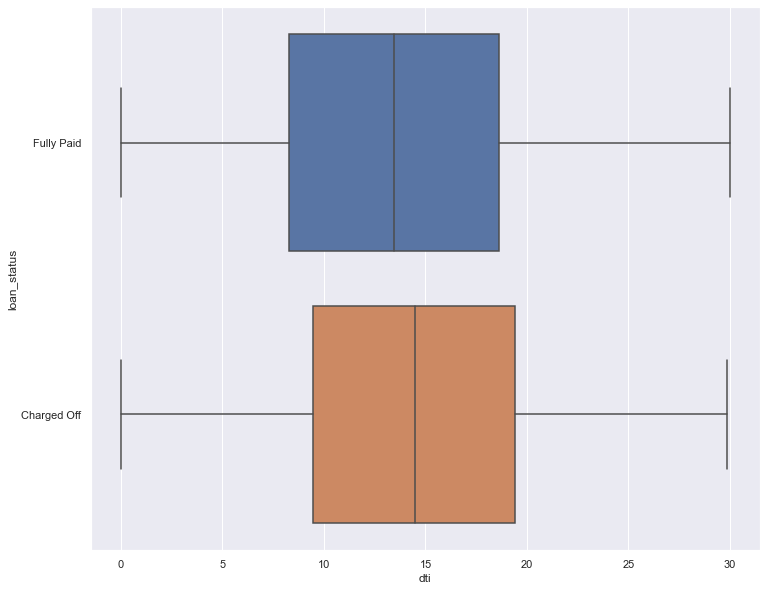

In [184]:
sns.boxplot(x=raw_data['dti'], y=raw_data['loan_status'], data=raw_data)
plt.show()

**Observation**
- Median and mean for values for dti in charged off category are on higher side.

#### 3.16.2 Analysing Charged Off Members Only

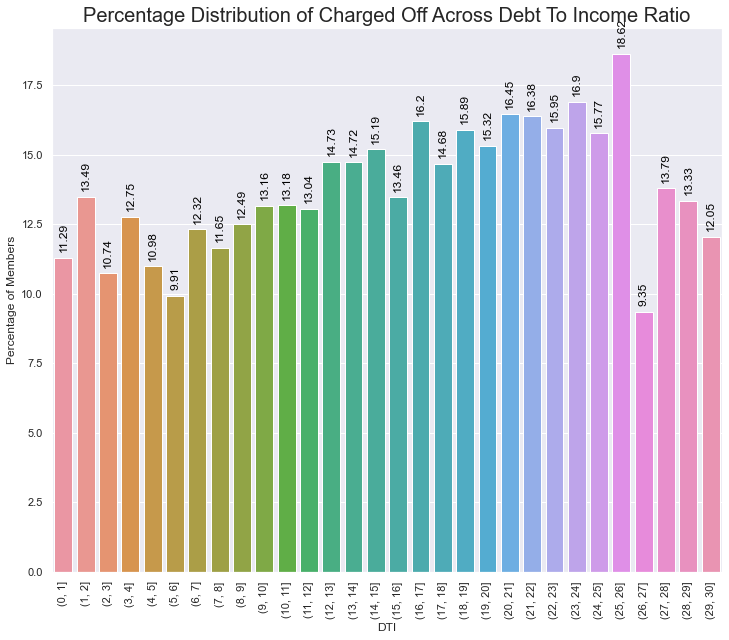

In [185]:
dti_df = raw_data.pivot_table(index='dti_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
dti_df['total'] = dti_df.sum(axis=1)
dti_df = dti_df.iloc[:,:-1].div(dti_df["total"], axis=0)*100
chart = sns.barplot(x = dti_df['Charged Off'].index, y=dti_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
label_deviation_above_y_axis = dti_df['Charged Off'].max() * 0.015
for index, value in enumerate(dti_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("DTI")
plt.ylabel("Percentage of Members")
plt.title("Percentage Distribution of Charged Off Across Debt To Income Ratio", fontdict={'fontsize': 20})
plt.show()
# dti_df

**Observation**
- As the seen from graph the charged of percent in category increases as dti increases.
- After 20dti application should be categorise as risky application.

### 3.17 Analysis of "Delinquency Count (in Last 2 Years)" column

#### 3.17.1 Analysing Fully Paid + Charged Off Members

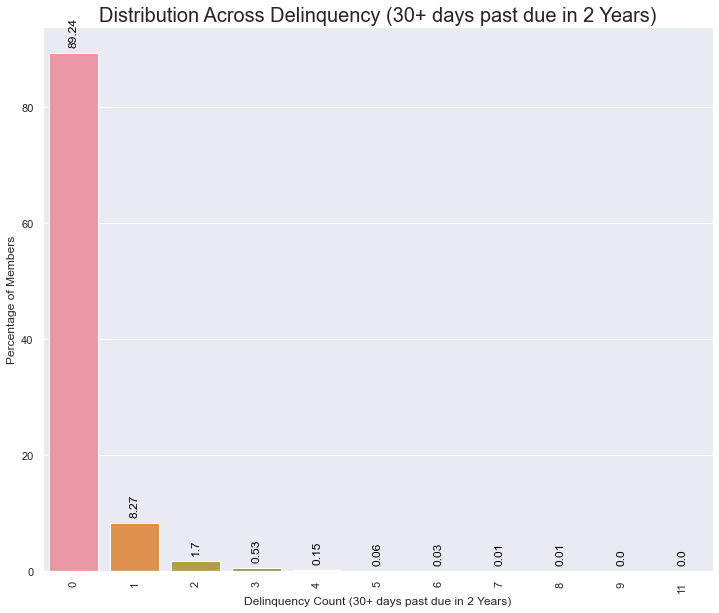

In [186]:
delinq_2yrs_dist = raw_data.delinq_2yrs.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=delinq_2yrs_dist.index, y=delinq_2yrs_dist.values)
plt.title('Distribution Across Delinquency (30+ days past due in 2 Years)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = delinq_2yrs_dist.max() * 0.015
for index, value in enumerate(delinq_2yrs_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Delinquency Count (30+ days past due in 2 Years)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.17.2 Analysing Charged Off Members Only

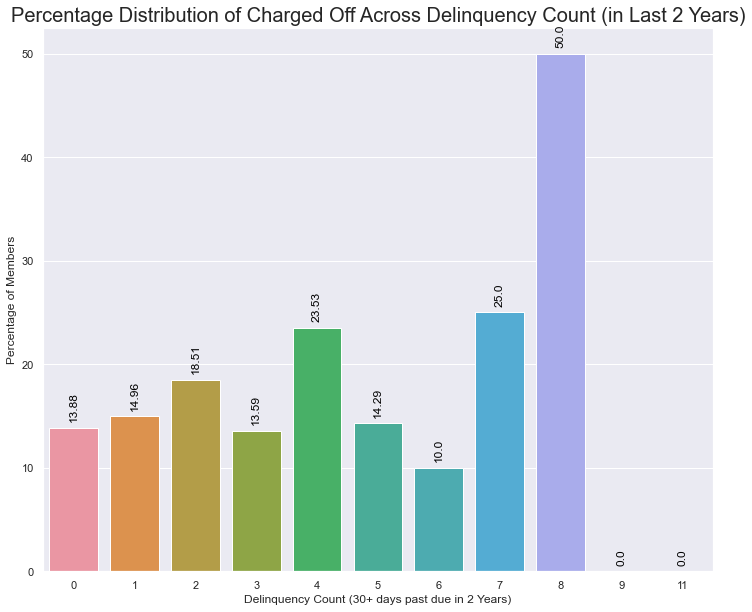

In [187]:
del_c_30_df = raw_data.pivot_table(index='delinq_2yrs', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
del_c_30_df['total'] = del_c_30_df.sum(axis=1)
del_c_30_df = del_c_30_df.iloc[:,:-1].div(del_c_30_df["total"], axis=0)*100
chart = sns.barplot(x = del_c_30_df['Charged Off'].index, y=del_c_30_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Delinquency Count (in Last 2 Years)", fontdict={'fontsize': 20})

label_deviation_above_y_axis = del_c_30_df['Charged Off'].max() * 0.015
for index, value in enumerate(del_c_30_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Delinquency Count (30+ days past due in 2 Years)")
plt.ylabel("Percentage of Members")

plt.show()
# del_c_30_df

**Observation**
- Values 7 and 8 increases the charged off cases substatially.

### 3.18 Analysis of "Earliest Credit Line Year" column

#### 3.18.1 Analysing Fully Paid + Charged Off Members

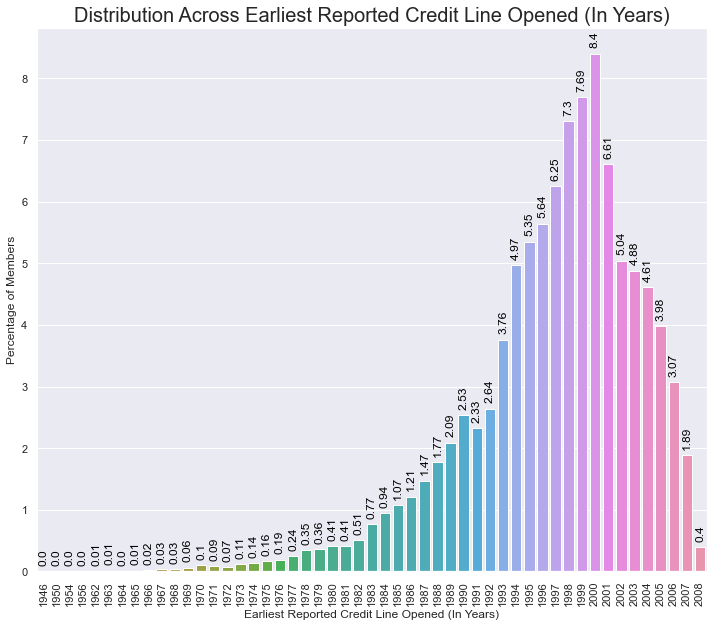

In [188]:
earliest_cr_line_year_dist = raw_data.groupby(by='earliest_cr_line_year').earliest_cr_line_year.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=earliest_cr_line_year_dist.index, y=earliest_cr_line_year_dist.values)
plt.title('Distribution Across Earliest Reported Credit Line Opened (In Years)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = earliest_cr_line_year_dist.max() * 0.015
for index, value in enumerate(earliest_cr_line_year_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Earliest Reported Credit Line Opened (In Years)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.18.2 Analysing Charged Off Members Only

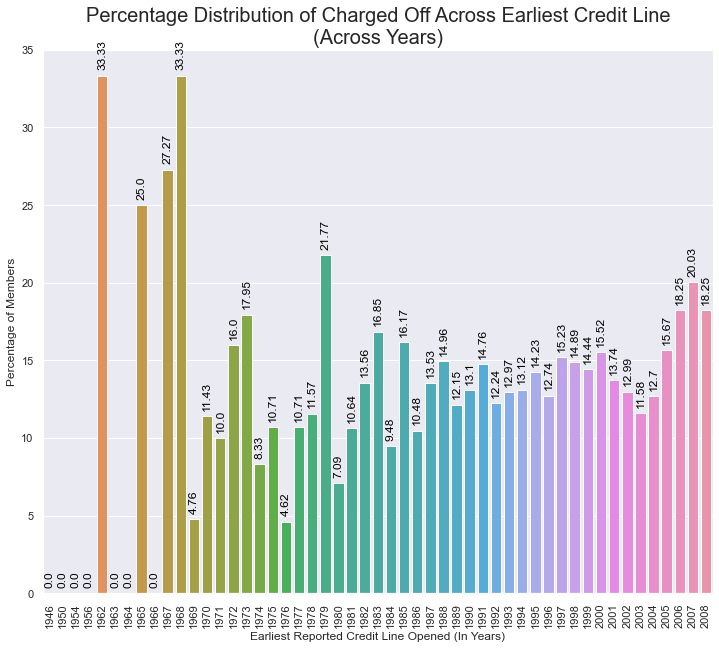

In [189]:
earliest_cr_year_df = raw_data.pivot_table(index='earliest_cr_line_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_year_df['total'] = earliest_cr_year_df.sum(axis=1)
earliest_cr_year_df = earliest_cr_year_df.iloc[:,:-1].div(earliest_cr_year_df["total"], axis=0)*100
chart = sns.barplot(x = earliest_cr_year_df['Charged Off'].index, y=earliest_cr_year_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
label_deviation_above_y_axis = earliest_cr_year_df['Charged Off'].max() * 0.015
for index, value in enumerate(earliest_cr_year_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Earliest Reported Credit Line Opened (In Years)")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Years)", fontdict={'fontsize': 20})
plt.show()
# earliest_cr_year_df

**Observation**
- We see that, as the year increases, proportion of members getting default also increases.

### 3.19 Analysis of "Earliest Credit Line Month" column

#### 3.19.1 Analysing Fully Paid + Charged Off Members

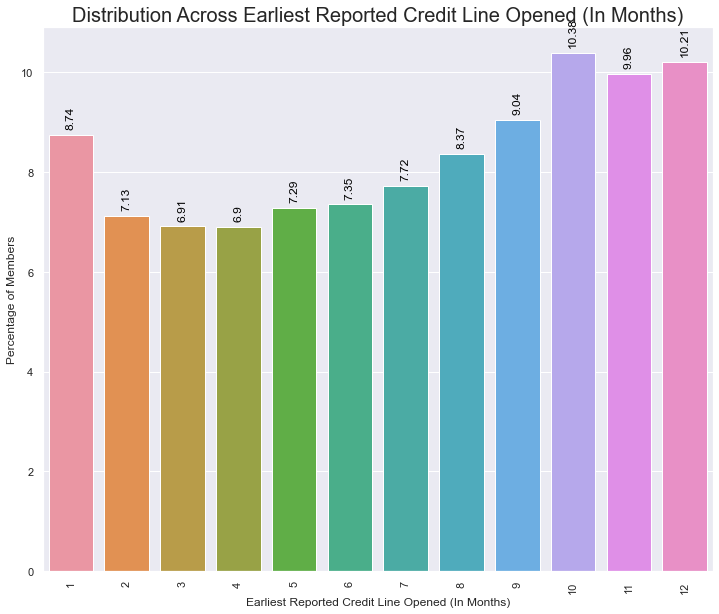

In [190]:
earliest_cr_line_month_dist = raw_data.groupby(by='earliest_cr_line_month').earliest_cr_line_month.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=earliest_cr_line_month_dist.index, y=earliest_cr_line_month_dist.values)
plt.title('Distribution Across Earliest Reported Credit Line Opened (In Months)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = earliest_cr_line_month_dist.max() * 0.015
for index, value in enumerate(earliest_cr_line_month_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Earliest Reported Credit Line Opened (In Months)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.19.2 Analysing Charged Off Members Only

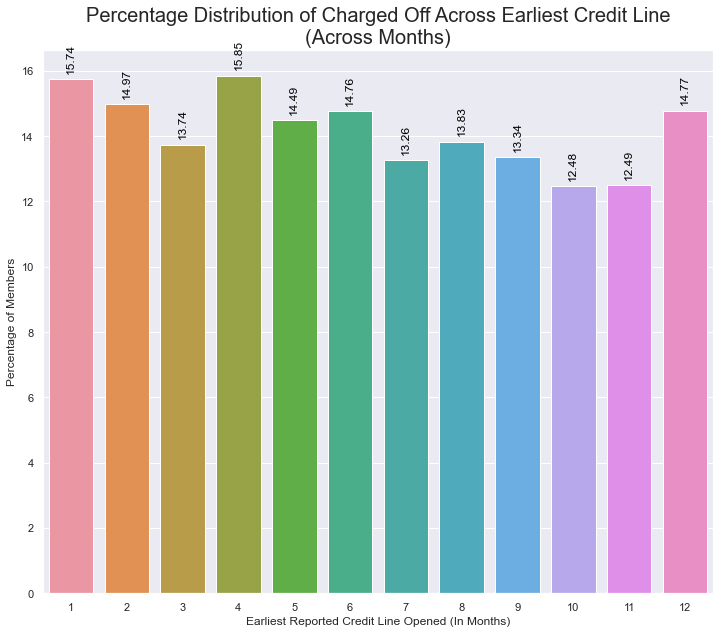

In [191]:
earliest_cr_month_df = raw_data.pivot_table(index='earliest_cr_line_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_month_df['total'] = earliest_cr_month_df.sum(axis=1)
earliest_cr_month_df = earliest_cr_month_df.iloc[:,:-1].div(earliest_cr_month_df["total"], axis=0)*100
chart = sns.barplot(x = earliest_cr_month_df['Charged Off'].index, y=earliest_cr_month_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = earliest_cr_month_df['Charged Off'].max() * 0.015
for index, value in enumerate(earliest_cr_month_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Earliest Reported Credit Line Opened (In Months)")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Months)", fontdict={'fontsize': 20})
plt.show()
# earliest_cr_month_df

**Observation**
- We see that, as the month changes from Jan to Dec, proportion of members getting default decreases.

### 3.20 Analysis of "Inquiries Count (In Last 6 Months)" column

#### 3.20.1 Analysing Fully Paid + Charged Off Members

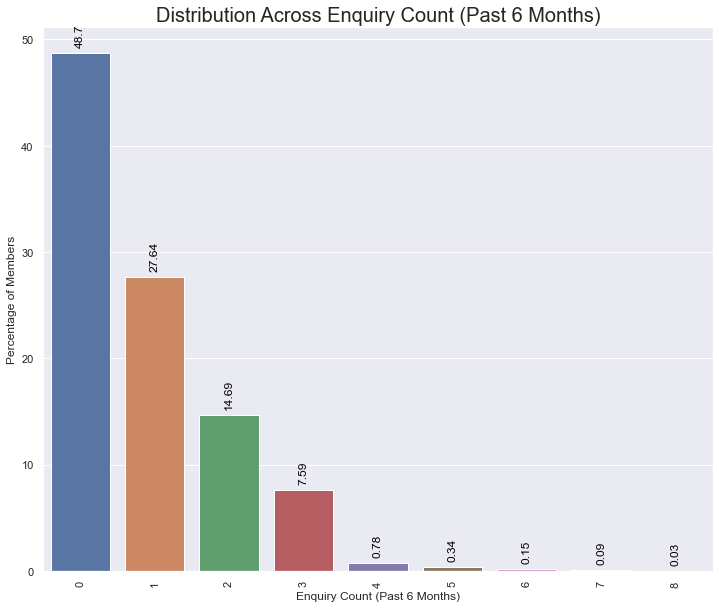

In [192]:
inq_last_6mths_dist = raw_data.inq_last_6mths.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=inq_last_6mths_dist.index, y=inq_last_6mths_dist.values)
plt.title('Distribution Across Enquiry Count (Past 6 Months)', fontdict={'fontsize': 20})
label_deviation_above_y_axis = inq_last_6mths_dist.max() * 0.015
for index, value in enumerate(inq_last_6mths_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Enquiry Count (Past 6 Months)")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.20.2 Analysing Charged Off Members Only

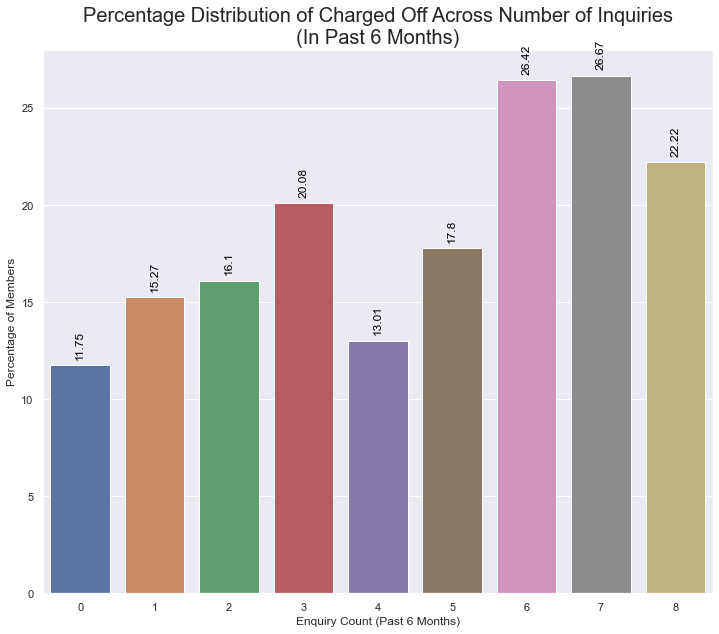

In [193]:
enq_count_df = raw_data.pivot_table(index='inq_last_6mths', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
enq_count_df['total'] = enq_count_df.sum(axis=1)
enq_count_df = enq_count_df.iloc[:,:-1].div(enq_count_df["total"], axis=0)*100
chart = sns.barplot(x = enq_count_df['Charged Off'].index, y=enq_count_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = enq_count_df['Charged Off'].max() * 0.015
for index, value in enumerate(enq_count_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Enquiry Count (Past 6 Months)")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Number of Inquiries\n(In Past 6 Months)", fontdict={'fontsize': 20})
plt.show()
# enq_count_df

**Observation**
- We see that, as the enquiry count increases, proportion of members getting default also increases.

### 3.21 Analysis of "Number of Credit Lines Available" column

#### 3.21.1 Analysing Fully Paid + Charged Off Members

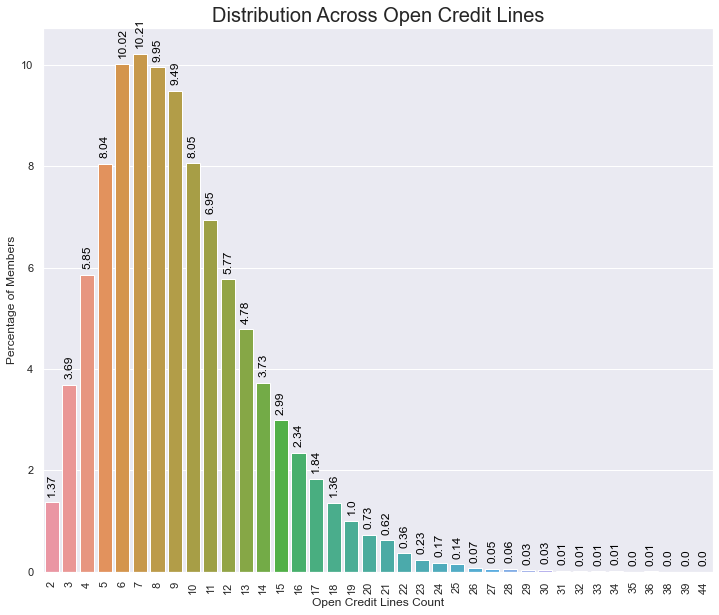

In [194]:
open_acc_dist = raw_data.groupby(by='open_acc').open_acc.count() / len(raw_data) * 100
graph_1 = sns.barplot(x=open_acc_dist.index, y=open_acc_dist.values)
plt.title('Distribution Across Open Credit Lines', fontdict={'fontsize': 20})
label_deviation_above_y_axis = open_acc_dist.max() * 0.015
for index, value in enumerate(open_acc_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Open Credit Lines Count")
plt.ylabel("Percentage of Members")
plt.show()

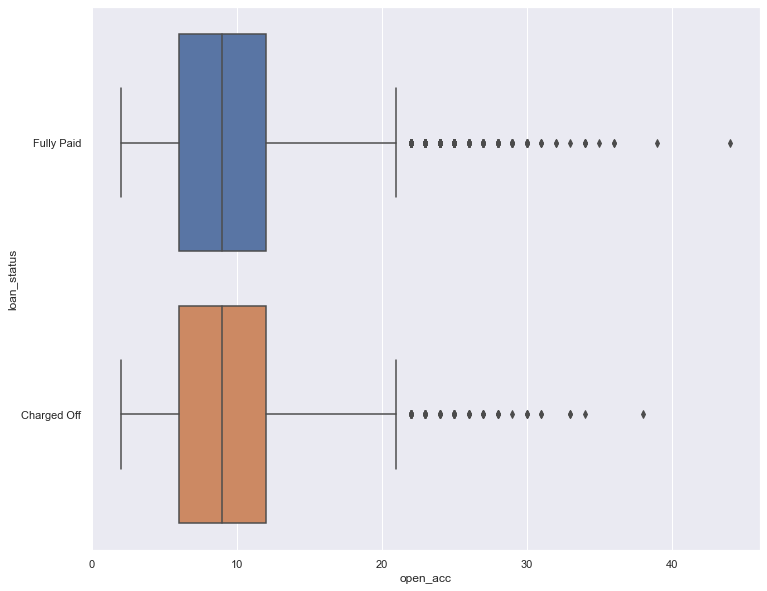

In [195]:
sns.boxplot(x=raw_data['open_acc'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [196]:
raw_data.groupby('loan_status')['open_acc'].describe()

count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   4874.0  9.281288  4.479778  2.0  6.0  9.0  12.0  38.0
Fully Paid   29788.0  9.291527  4.336627  2.0  6.0  9.0  12.0  44.0

**Observation**
- There almost no difference in mean and median values for charged off and fully paid cate, so this variable will help in making decision.

#### 3.21.2 Analysing Charged Off Members Only

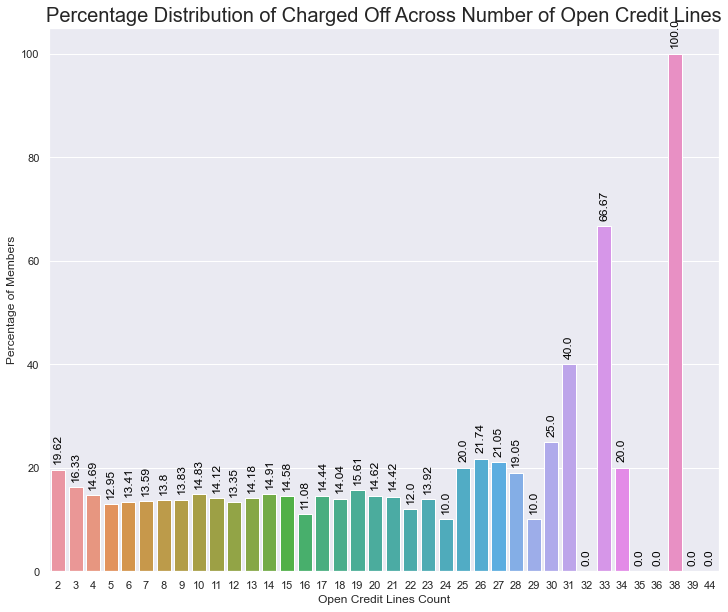

In [197]:
open_acc_df = raw_data.pivot_table(index='open_acc', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
open_acc_df['total'] = open_acc_df.sum(axis=1)
open_acc_df = open_acc_df.iloc[:,:-1].div(open_acc_df["total"], axis=0)*100
chart = sns.barplot(x = open_acc_df['Charged Off'].index, y=open_acc_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = open_acc_df['Charged Off'].max() * 0.015
for index, value in enumerate(open_acc_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
plt.xlabel("Open Credit Lines Count")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Number of Open Credit Lines", fontdict={'fontsize': 20})
plt.show()
# open_acc_df

**Observation(s)**
- 
- 

### 3.22 Analysis of "Derogatory Public Records" column

#### 3.22.1 Analysing Fully Paid + Charged Off Members

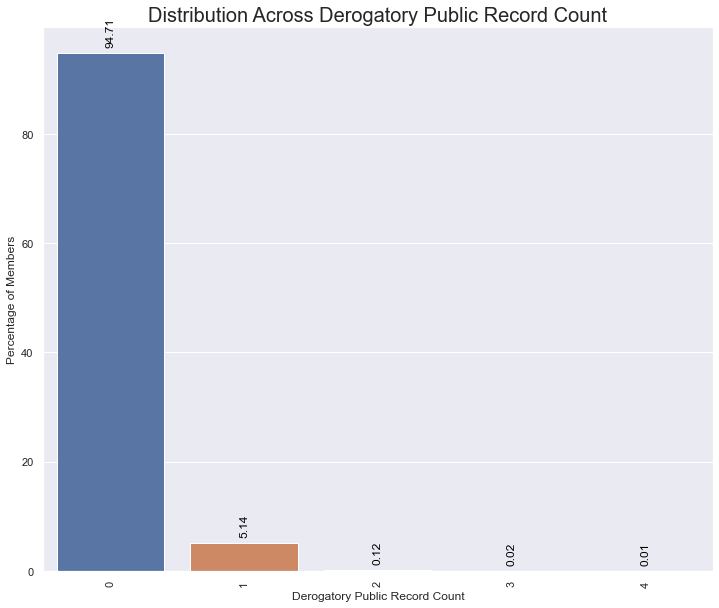

In [198]:
pub_rec_dist = raw_data.pub_rec.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=pub_rec_dist.index, y=pub_rec_dist.values)
plt.title('Distribution Across Derogatory Public Record Count', fontdict={'fontsize': 20})
label_deviation_above_y_axis = pub_rec_dist.max() * 0.015
for index, value in enumerate(pub_rec_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Derogatory Public Record Count")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.22.2 Analysing Charged Off Members Only

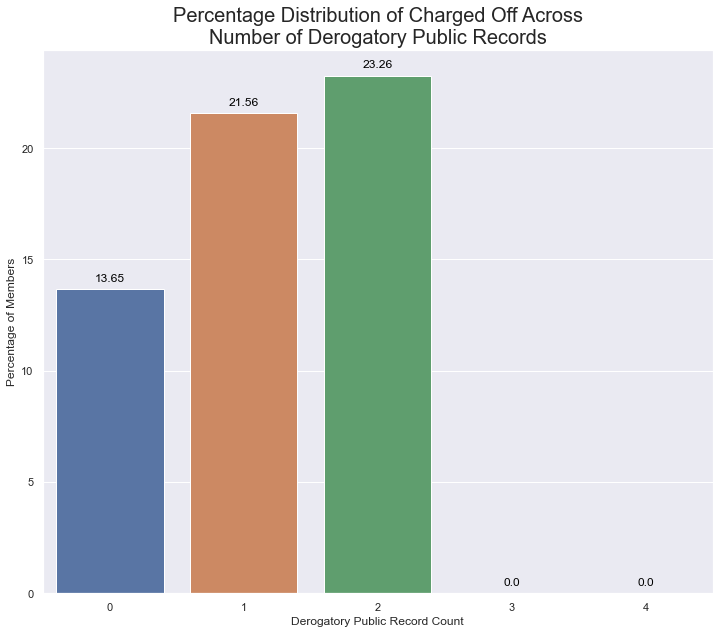

In [199]:
pub_rec_df = raw_data.pivot_table(index='pub_rec', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
pub_rec_df['total'] = pub_rec_df.sum(axis=1)
pub_rec_df = pub_rec_df.iloc[:,:-1].div(pub_rec_df["total"], axis=0)*100
chart = sns.barplot(x = pub_rec_df['Charged Off'].index, y=pub_rec_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = pub_rec_df['Charged Off'].max() * 0.015
for index, value in enumerate(pub_rec_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Derogatory Public Record Count")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across\nNumber of Derogatory Public Records", fontdict={'fontsize': 20})
plt.show()
# pub_rec_df

**Observation**
- We see that, as the Derogatory Public Records increases, proportion of members getting default decreases.

### 3.23 Analysis of "Revolving Balance" column

#### 3.23.1 Analysing Fully Paid + Charged Off Members

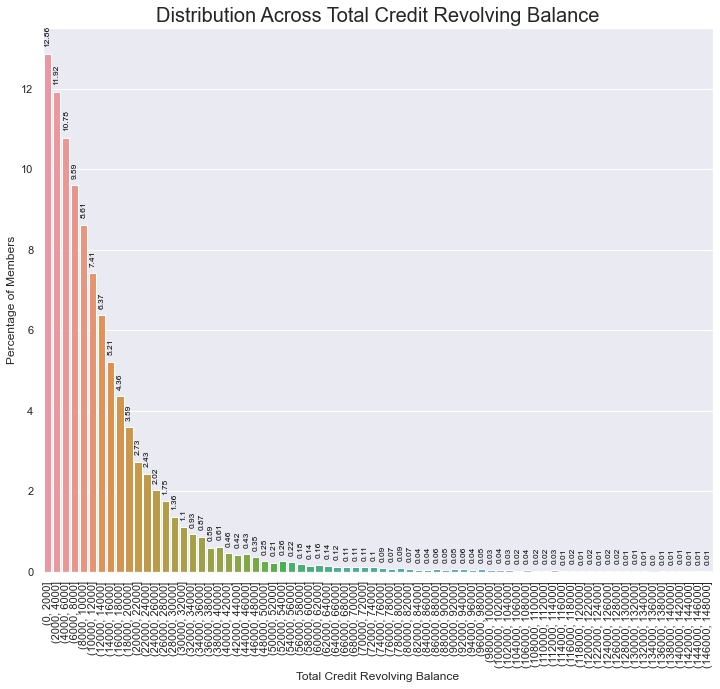

In [200]:
revol_bal_category_dist = raw_data.revol_bal_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=revol_bal_category_dist.index, y=revol_bal_category_dist.values)
plt.title('Distribution Across Total Credit Revolving Balance', fontdict={'fontsize': 20})
label_deviation_above_y_axis = revol_bal_category_dist.max() * 0.015
for index, value in enumerate(revol_bal_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical', fontsize='x-small')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Total Credit Revolving Balance")
plt.ylabel("Percentage of Members")
plt.show()

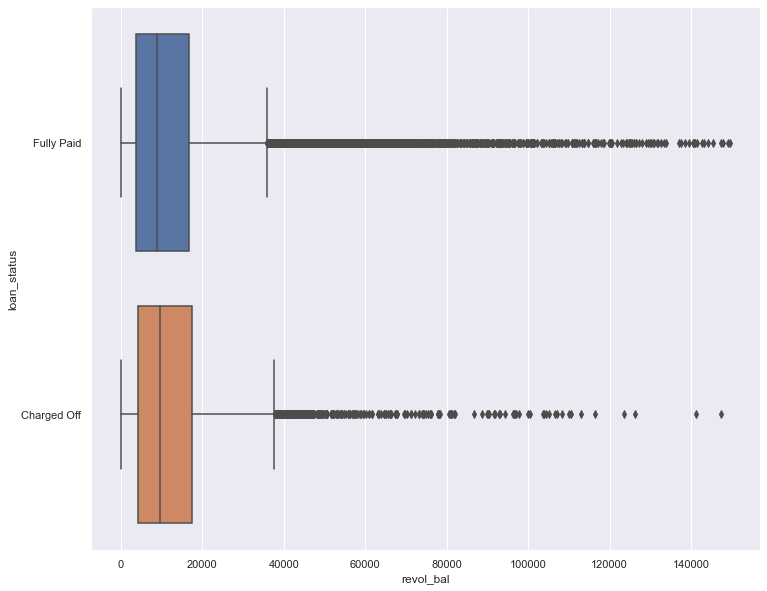

In [201]:
sns.boxplot(x=raw_data['revol_bal'], y=raw_data['loan_status'], data=raw_data)
plt.show()

**Observation**
- There is no large difference in Charged off and Fully paid distribution, this column will not have any significant impact on descision.

#### 3.23.2 Analysing Charged Off Members Only

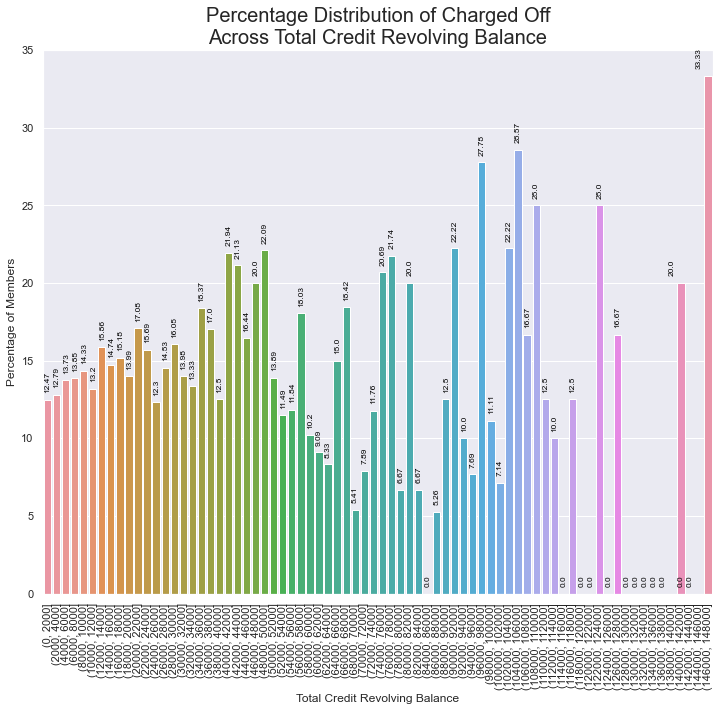

In [202]:
revol_bal_df = raw_data.pivot_table(index='revol_bal_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_bal_df['total'] = revol_bal_df.sum(axis=1)
revol_bal_df = revol_bal_df.iloc[:,:-1].div(revol_bal_df["total"], axis=0)*100
chart = sns.barplot(x = revol_bal_df['Charged Off'].index, y=revol_bal_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

label_deviation_above_y_axis = revol_bal_df['Charged Off'].max() * 0.015
for index, value in enumerate(revol_bal_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation='vertical', fontsize='x-small')
plt.xlabel("Total Credit Revolving Balance")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off\nAcross Total Credit Revolving Balance", fontdict={'fontsize': 20})
plt.show()
# revol_bal_df

**Observation**
- We see that, as the Revolving Balance increases, proportion of members getting default also increases.

### 3.24 Analysis of "Revolving Utilization Rate" column

#### 3.24.1 Analysing Fully Paid + Charged Off Members

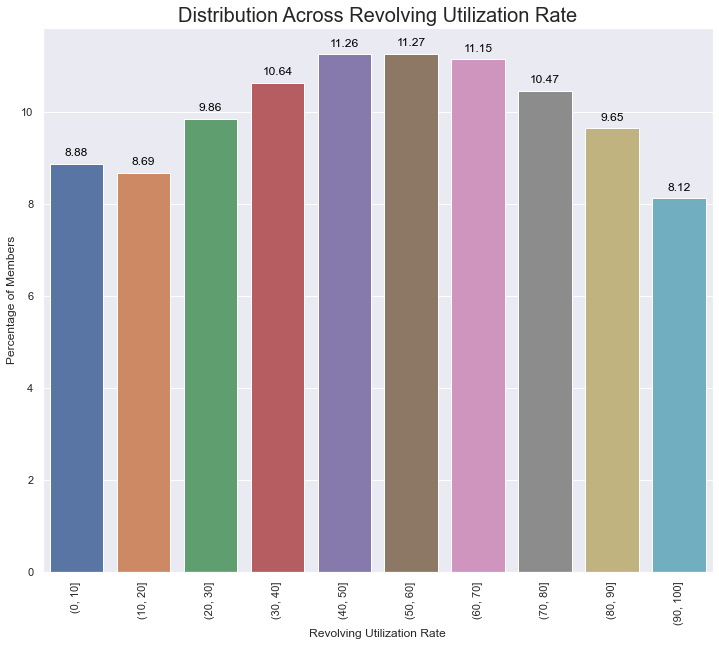

In [203]:
revol_util_category_dist = raw_data.revol_util_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=revol_util_category_dist.index, y=revol_util_category_dist.values)
plt.title('Distribution Across Revolving Utilization Rate', fontdict={'fontsize': 20})
label_deviation_above_y_axis = revol_util_category_dist.max() * 0.015
for index, value in enumerate(revol_util_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Revolving Utilization Rate")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.24.2 Analysing Charged Off Members Only

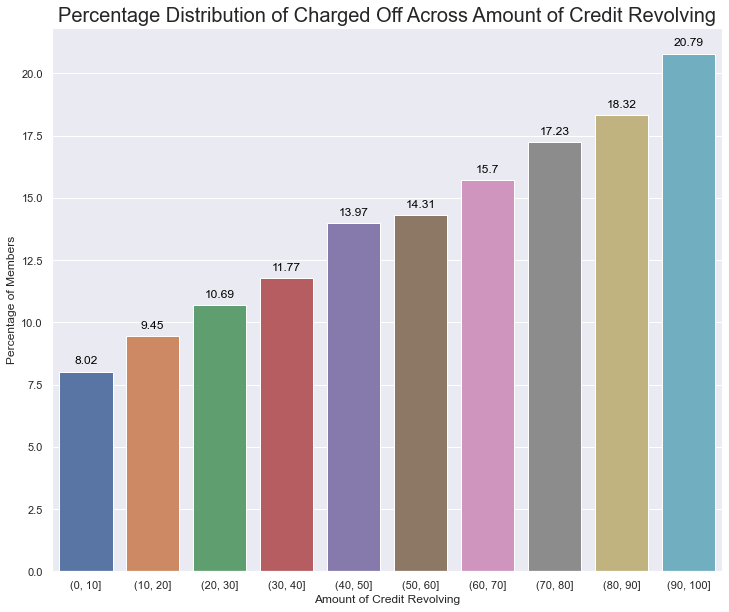

In [204]:
revol_util_df = raw_data.pivot_table(index='revol_util_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_util_df['total'] = revol_util_df.sum(axis=1)
revol_util_df = revol_util_df.iloc[:,:-1].div(revol_util_df["total"], axis=0)*100
chart = sns.barplot(x = revol_util_df['Charged Off'].index, y=revol_util_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = revol_util_df['Charged Off'].max() * 0.015
for index, value in enumerate(revol_util_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Amount of Credit Revolving")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across Amount of Credit Revolving", fontdict={'fontsize': 20})
plt.show()
# revol_util_df

**Observation**
- We see that, as the Revolving Balance increases, proportion of members getting default also increases.

### 3.25 Analysis of "Total Credit Lines" column

#### 3.25.1 Analysing Fully Paid + Charged Off Members

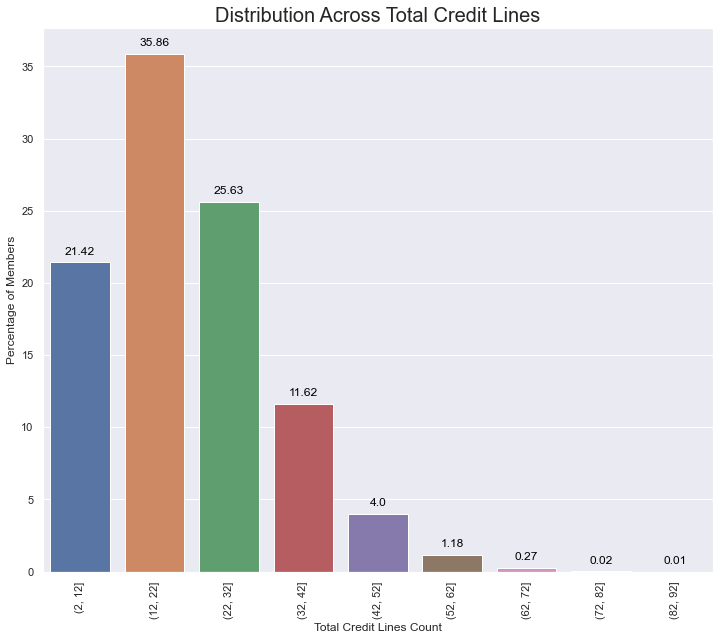

In [205]:
total_acc_category_dist = raw_data.total_acc_category.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=total_acc_category_dist.index, y=total_acc_category_dist.values)
plt.title('Distribution Across Total Credit Lines', fontdict={'fontsize': 20})
label_deviation_above_y_axis = total_acc_category_dist.max() * 0.015
for index, value in enumerate(total_acc_category_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=90)
plt.xlabel("Total Credit Lines Count")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.25.2 Analysing Charged Off Members Only

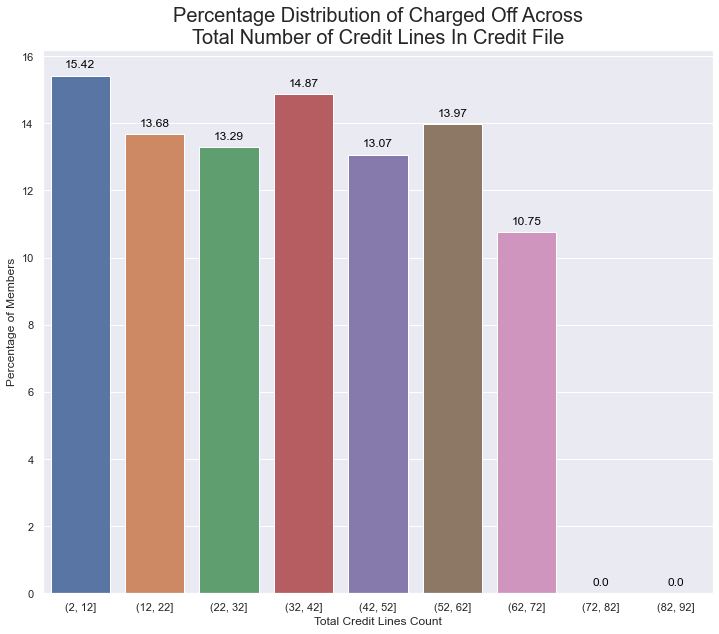

In [206]:
total_acc_df = raw_data.pivot_table(index='total_acc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
total_acc_df['total'] = total_acc_df.sum(axis=1)
total_acc_df = total_acc_df.iloc[:,:-1].div(total_acc_df["total"], axis=0)*100
chart = sns.barplot(x = total_acc_df['Charged Off'].index, y=total_acc_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = total_acc_df['Charged Off'].max() * 0.015
for index, value in enumerate(total_acc_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Total Credit Lines Count")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across\nTotal Number of Credit Lines In Credit File", fontdict={'fontsize': 20})
plt.show()
# total_acc_df

**Observation**
- We see that, as the Total Credit Line increases, proportion of members getting default decreases.

### 3.26 Analysis of "Remaining Oustanding Principal" column

In [207]:
raw_data.out_prncp_category.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: out_prncp_category, dtype: object

#### Remaining Outstanding Principal Column contains no value after removing rows coresponding to loan_status column which are marked as "Current"

### 3.27 Analysis of "Remaining Oustanding Principal (Of Total Amount Funded by Investors)" column

In [208]:
raw_data.out_prncp_inv_category.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: out_prncp_inv_category, dtype: object

#### Remaining Oustanding Principal (Of Total Amount Funded by Investors) contains no value after removing rows coresponding to loan_status column which are marked as "Current"

### 3.28 Analysis of "Number of Public Record Bankruptcies" column

#### 3.28.1 Analysing Fully Paid + Charged Off Members

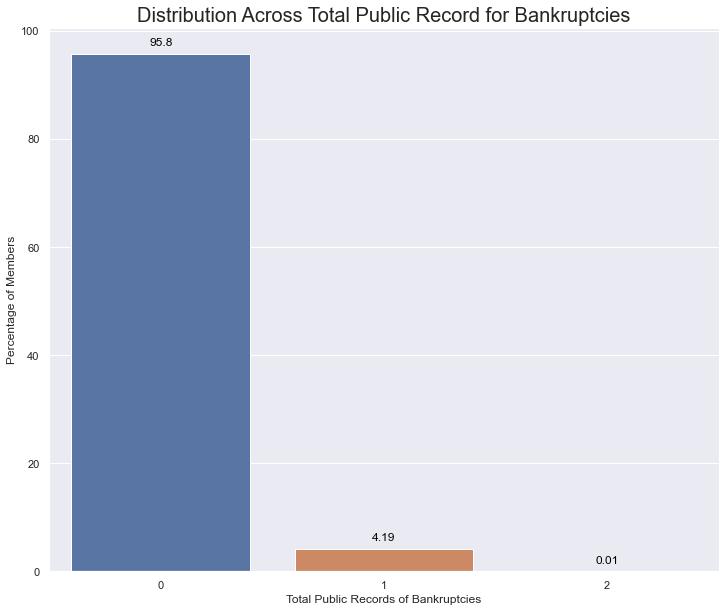

In [209]:
pub_rec_bankruptcies_dist = raw_data.pub_rec_bankruptcies.value_counts(normalize=True, sort=False)*100
graph_1 = sns.barplot(x=pub_rec_bankruptcies_dist.index, y=pub_rec_bankruptcies_dist.values)
plt.title('Distribution Across Total Public Record for Bankruptcies', fontdict={'fontsize': 20})
label_deviation_above_y_axis = pub_rec_bankruptcies_dist.max() * 0.015
for index, value in enumerate(pub_rec_bankruptcies_dist.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.xlabel("Total Public Records of Bankruptcies")
plt.ylabel("Percentage of Members")
plt.show()

**Observation(s)**
- 
- 

#### 3.28.2 Analysing Charged Off Members Only

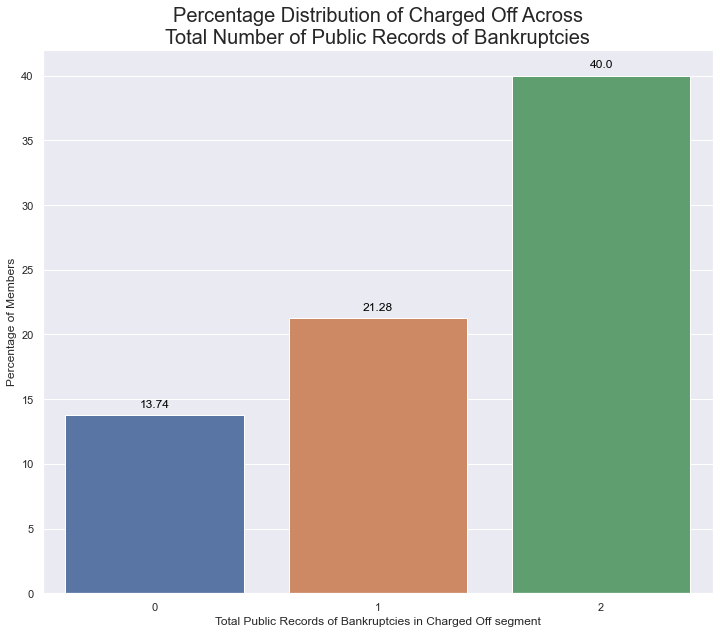

In [210]:
pub_rec_bankruptcies_df = raw_data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
pub_rec_bankruptcies_df['total'] = pub_rec_bankruptcies_df.sum(axis=1)
pub_rec_bankruptcies_df = pub_rec_bankruptcies_df.iloc[:,:-1].div(pub_rec_bankruptcies_df["total"], axis=0)*100
chart = sns.barplot(x = pub_rec_bankruptcies_df['Charged Off'].index, y=pub_rec_bankruptcies_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

label_deviation_above_y_axis = pub_rec_bankruptcies_df['Charged Off'].max() * 0.015
for index, value in enumerate(pub_rec_bankruptcies_df['Charged Off'].iteritems()):
    chart.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center")
plt.xlabel("Total Public Records of Bankruptcies in Charged Off segment")
plt.ylabel("Percentage of Members")

plt.title("Percentage Distribution of Charged Off Across\nTotal Number of Public Records of Bankruptcies", fontdict={'fontsize': 20})
plt.show()
# pub_rec_bankruptcies_df

**Observation**
- From Above bar chart it could be clearly infered that with increase in public bankruptcy records chaces of loan going for charged off increases.

# 4. Analysing Variables (Available Before Applying Loan)

In [211]:
# ser = raw_data.groupby(by='emp_length').funded_amnt.mean()
# sns.barplot(x=ser.index, y=ser.values)

In [212]:
# ser = raw_data.groupby(by='emp_length').funded_amnt.mean()
# sns.barplot(x=ser.index, y=ser.values)

In [213]:
# ser = raw_data.groupby(by='dti_category').annual_inc.mean()
# chart = sns.barplot(x=ser.index, y=ser.values)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# plt.show()

In [214]:
# sns.heatmap(raw_data.pivot_table(index='emp_length', columns='dti_category', values='funded_amnt', aggfunc='count'))